In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

strat_pkg = 'IDE'

mpl_finance_path = '/content/drive/My Drive/Colab Notebooks/JnQ/mpl_finance'

if mpl_finance_path not in sys.path:

  try:
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ')
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ/{}'.format(strat_pkg))
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ/funcs')
    sys.path.insert(0, mpl_finance_path)
    
  except Exception as e:
    print(e)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# requirements

In [ ]:
# !pip install findiff
# import nvstrings, nvcategory, cudf
# import cuml
# import cudf

import os
from funcs.funcs_idep import *
from funcs.funcs_duration_v2 import *
from funcs.funcs_plot_check import *
from funcs.funcs_pairing import *
# from funcs.funcs_ide import *
# from funcs.funcs_indicator_candlescore import *
from funcs.funcs_indicator import *
from funcs.funcs_trader import *
from ast import literal_eval
import logging
import importlib

import mpl_finance as mf
import matplotlib.pyplot as plt
from matplotlib import gridspec
# from tqdm.notebook import tqdm

import IPython
import IPython.display

import numpy as np
# import jax.numpy as np
import pandas as pd
# import seaborn as sns
# import tensorflow as tf
from scipy import stats, signal

import pickle
import shutil
import json
from easydict import EasyDict
import copy

import datetime
from datetime import datetime
import random
import time
# import warnings

# warnings.simplefilter("ignore", category=RuntimeWarning)

np.seterr(invalid="ignore")
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=2000) 

pd.set_option('mode.chained_assignment',  None)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# makeset - with to_htf dataframes

## sync_check_make

In [ ]:
def sd_dc(df, period1, period2, ltf_df=None):
    assert period1 <= period2, "assert period1 <= period2"
    donchian_channel_v2(df, period1)
    donchian_channel_v2(df, period2)
    itv = pd.infer_freq(df.index)
    if itv != 'T':
      assert ltf_df is not None, "assert ltf_df is not None"
      ltf_df = ltf_df.join(to_lower_tf_v2(ltf_df, df, [-4, -3, -2, -1]), how='inner')
    else:
      ltf_df = df

    ltf_df['short_base_{}'.format(itv)] = (ltf_df['dc_lower_{}{}'.format(itv, period1)].to_numpy() + ltf_df['dc_upper_{}{}'.format(itv, period2)].to_numpy()) / 2
    ltf_df['long_base_{}'.format(itv)] = (ltf_df['dc_upper_{}{}'.format(itv, period1)].to_numpy() + ltf_df['dc_lower_{}{}'.format(itv, period2)].to_numpy()) / 2

    return ltf_df

def donchian_channel_v2(df, period):
  itv = pd.infer_freq(df.index)
  df['dc_upper_{}{}'.format(itv, period)] = df['high'].rolling(period).max()
  df['dc_lower_{}{}'.format(itv, period)] = df['low'].rolling(period).min()

  return

In [ ]:
def sync_check_make(df):

    make_itv_list = ['3T', '5T', '15T', '30T', 'H', '4H', 'D']
    offset_list = ['1h', '1h', '1h', '1h', '1h', '1h', '9h']

    assert len(make_itv_list) == len(offset_list), "length of itv & offset_list should be equal"
        
    htf_df_list = [to_htf(df, itv_=itv_, offset=offset_) for itv_, offset_ in zip(make_itv_list, offset_list)]

    df_3T, df_5T, df_15T, df_30T, df_H, df_4H, df_D = htf_df_list

    for htf_df in htf_df_list:
      print("{} -> ".format(pd.infer_freq(htf_df.index)), htf_df.tail(1))

    # heikinashi_v2(res_df_)
    # h_candle_v3(res_df, '5T')

    # --------------- sd_dc --------------- #
    df = sd_dc(df, 20, 40)
    df = sd_dc(df_5T, 20, 40, df)
    df = sd_dc(df_H, 20, 40, df)

    print("sd_dc phase done")

    # --------------- normalize data --------------- #
    # lb_period = 15
    # target_col = 'close_{}'.format(lb_period)
    # target_data = df['close'].diff(lb_period).to_numpy()
    # norm_data(df, target_data, target_col)    
    # print("normalize data phase done !")

    # --------------- lucid sar --------------- #
    # lucid_sar_v2(df)
    # lucid_sar_v2(df_3T)
    # df = df.join(to_lower_tf_v2(df, df_3T, [-2, -1]), how='inner')
    # lucid_sar_v2(df_5T)
    # df = df.join(to_lower_tf_v2(df, df_5T, [-2, -1]), how='inner')
    # lucid_sar_v2(df_15T)
    # df = df.join(to_lower_tf_v2(df, df_15T, [-2, -1]), how='inner')
    # lucid_sar_v2(df_30T)
    # df = df.join(to_lower_tf_v2(df, df_30T, [-2, -1]), how='inner')       

    # print("sar phase done")

    # --------------- supertrend --------------- #
    # df = st_price_line(df, df_3T, '3m')
    # df = st_price_line(df, df_5T, '5m')
    # df = st_price_line(df, df_15T, '15m')
    # df = st_price_line(df, df_30T, '30m')
    # df = st_price_line(df, df_H, '1h')
    # df = st_price_line(df, df_4H, '4h')

    # print("supertrend phase done")

    # --------------- rsi --------------- #  
    # df['rsi_1m'] = rsi(df, 14)    
    # df_5T['rsi_5m'] = rsi(df_5T, 14)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['rsi_5m']))
    
    # print("rsi phase done")


    # --------------- cci --------------- #  
    # df['cci_1m'] = cci(df, 20)

    # print("cci phase done")

    # --------------- ema --------------- #      
    # df_5T['ema_5m'] = ema(df_5T['close'], 195)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['ema_5m']))
    
    # print("ema phase done")
    
    # # --------------- bband --------------- #  
    # df = bb_width_v2(df, period, multiple)

    # print("bband phase done")

    # --------------- cbline --------------- #    
    # df_3T['cloud_bline_3m'] = cloud_bline(df_3T, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_3T, [-1]), columns=['cloud_bline_3m']))
    # df_5T['cloud_bline_5m'] = cloud_bline(df_5T, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['cloud_bline_5m']))
    # df_15T['cloud_bline_15m'] = cloud_bline(df_15T, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_15T, [-1]), columns=['cloud_bline_15m']))
    # df_30T['cloud_bline_30m'] = cloud_bline(df_30T, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_30T, [-1]), columns=['cloud_bline_30m']))
    # df_H['cloud_bline_1h'] = cloud_bline(df_H, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_H, [-1]), columns=['cloud_bline_1h']))
    # df_4H['cloud_bline_4h'] = cloud_bline(df_4H, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_4H, [-1]), columns=['cloud_bline_4h']))

    # print("cbline phase done")
    
    
    # --------------- stochastic --------------- #
    # df['stoch_1m'] = stoch(df, 13, 3, 3)

    # df_5T['stoch'] = stoch(df_5T, 13, 3, 3)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1], backing_i=-1), columns=['stoch_5m']))

    # print("stoch phase done")


    return df


## make & save res_df (concat 생각하면, timeindex sync 맞춰야함)

### old (xlsx)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  if '2021-07-01'.upper() not in file_list[i]:
  # if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    excel_name = key.replace(".xlsx", "_st1h_backi2.xlsx")
    excel_path = save_path + excel_name

    if excel_name in exist_list:
      print(excel_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)

    latest_open_index = sorted(open_indexes)[-1]
    
    open_ts = datetime.timestamp(latest_open_index)
    latest_open_index_1m = datetime.fromtimestamp(open_ts + a_day)

    #   str 로 만들어 접근하면 불가함  #
    end_index = pd.to_datetime(str(df.index[-1]).split(" ")[0] + " 08:59:59.999000")
    # break

    sliced_df = df.loc[latest_open_index_1m:end_index] # to_lower_tf 의 기준 ltf
    sliced_second_df = second_df.loc[latest_open_index:end_index]
    sliced_third_df = third_df.loc[latest_open_index:end_index]
    sliced_fourth_df = fourth_df.loc[latest_open_index:end_index]
    sliced_fifth_df = fifth_df.loc[latest_open_index:end_index]

    print("sliced index")
    print(sliced_df.index[[0, -1]])
    print(sliced_second_df.index[[0, -1]])
    print(sliced_third_df.index[[0, -1]])
    print(sliced_fourth_df.index[[0, -1]])
    print(sliced_fifth_df.index[[0, -1]])

    try:
      sliced_sixth_df = sixth_df.loc[latest_open_index:end_index]
      sliced_seventh_df = seventh_df.loc[latest_open_index:end_index]

      print(sliced_sixth_df.index[[0, -1]])
      print(sliced_seventh_df.index[[0, -1]])

      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df, sliced_sixth_df, sliced_seventh_df)
    
    except:
      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df)



    res_df.to_excel(excel_path)
    print(excel_name, "saved succesfully !")

NameError: ignored

### xlsx to feather

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  # if '2021-07-01'.upper() not in file_list[i]:
  if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    feather_name = key.replace(".xlsx", ".ftr")
    # feather_path = save_path + feather_name

    if feather_name in exist_list:
      print(feather_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)


    df.reset_index().to_feather(date_path + feather_name, compression='lz4')
    second_df.reset_index().to_feather(date_path2 + feather_name, compression='lz4')
    third_df.reset_index().to_feather(date_path3 + feather_name, compression='lz4')
    fourth_df.reset_index().to_feather(date_path4 + feather_name, compression='lz4')
    fifth_df.reset_index().to_feather(date_path5 + feather_name, compression='lz4')
    sixth_df.reset_index().to_feather(date_path6 + feather_name, compression='lz4')
    seventh_df.reset_index().to_feather(date_path7 + feather_name, compression='lz4')

    print("xlsx converted to feather !")
    

  0%|          | 0/156 [00:00<?, ?it/s]

DatetimeIndex(['2021-06-28 00:00:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:02:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:04:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:14:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:29:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-09-14 03:59:59.999000', '2021-11-15 14:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-03-10 20:59:59.999000', '2021-11-15 16:59:59.999000'], dtype='datetime64[ns]', freq=None)

xlsx converted to feather !
DatetimeIndex(['2021-06-28 00:00:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:02:59.999000', '2021-10-10 23:59:59.999000'], dtype='

### add itv_name to ftr

In [ ]:
save_path = './candlestick_concated/res_df/'

# dir_path = "bbdc3m_backi2"
# date = '2021-10-10'
date = '2021-07-01'

db_path = './candlestick_concated/database_bn/non_cum/%s/' % date
os.makedirs(os.path.join(db_path), exist_ok=True)

# exist_list = os.listdir(os.path.join(save_path, dir_path))
# break


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue
        
    df = shutil.copy(date_path + key, db_path + key.replace(".ftr", "_%s.ftr" % interval))
    second_df = shutil.copy(date_path2 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval2))
    third_df = shutil.copy(date_path3 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval3))
    fourth_df = shutil.copy(date_path4 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval4))
    fifth_df = shutil.copy(date_path5 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval5))
    sixth_df = shutil.copy(date_path6 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval6))
    seventh_df = shutil.copy(date_path7 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval7))

    print("copied to" + db_path + key.replace(".ftr", "_%s.ftr" % interval))


  0%|          | 0/175 [00:00<?, ?it/s]

copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 BTCUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 BCHUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 XRPUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 EOSUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 LTCUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 ETCUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 LINKUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 XLMUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 ADAUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 ETHUSDT_1m.ftr


### feather ver. (database to res_df)

In [ ]:
# db_path = './candlestick_concated/database_ub/' # upbit
db_path = './candlestick_concated/database_bn/'   # binance

save_path = './candlestick_concated/res_df/'

save_dir_path = "bb1d_backi2"
date = '2022-02-17'

# concat_path = 'noncat' # 새로운 cols 를 기존 cum/concat 에 붙이려는 경우
concat_path = 'concat'
cum_path = "cum"
# cum_path = "non_cum"  # non_cum 으로 진행하는 경우, row concat 용도이기 때문에 noncat -> concat 으로 변경 (base cols 를 모두 담고 있음)

load_path = os.path.join(db_path, cum_path, date)
save_path = os.path.join(save_path, save_dir_path, concat_path, cum_path, date)

os.makedirs(save_path, exist_ok=True)

file_list = os.listdir(load_path)
exist_list = os.listdir(save_path)
# break

a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue

    if "_1m" not in key:
      continue

    # feather_name = key.replace(".ftr", "_%.ftr" % save_dir_path)
    feather_name = key.replace("_1m", "")
    feather_path = os.path.join(save_path, feather_name)

    if feather_name in exist_list:
      print(feather_name, "already exist !")
      continue
    
    df = pd.read_feather(os.path.join(load_path, key), columns=None, use_threads=True).set_index("index")

    res_df = sync_check_make(df)

    res_df.reset_index().to_feather(feather_path, compression='lz4')
    print(feather_path, "saved succesfully !")

  0%|          | 0/7 [00:00<?, ?it/s]

3T ->                          open     high      low    close
index                                                  
2022-01-10 15:18:00  3163.02  3164.29  3162.41  3164.28
5T ->                          open     high      low    close
index                                                  
2022-01-10 15:15:00  3160.51  3164.29  3159.01  3164.28
15T ->                          open     high      low    close
index                                                  
2022-01-10 15:15:00  3160.51  3164.29  3159.01  3164.28
30T ->                         open     high      low    close
index                                                 
2022-01-10 15:00:00  3171.7  3173.11  3156.02  3164.28
H ->                         open     high      low    close
index                                                 
2022-01-10 15:00:00  3171.7  3173.11  3156.02  3164.28
4H ->                         open     high      low    close
index                                                 
2022-01-10 13

#### just add col to loaded df

In [ ]:
res_df_ = sync_check_make(res_df_)

3T ->                          open     high      low    close
index                                                  
2022-02-17 10:27:00  3148.85  3150.08  3146.38  3146.76
5T ->                          open     high      low    close
index                                                  
2022-02-17 10:25:00  3146.85  3150.08  3145.44  3146.76
15T ->                          open    high      low    close
index                                                 
2022-02-17 10:15:00  3143.99  3151.0  3139.14  3146.76
30T ->                         open     high      low    close
index                                                 
2022-02-17 10:00:00  3148.8  3158.68  3139.14  3146.76
H ->                         open     high      low    close
index                                                 
2022-02-17 10:00:00  3148.8  3158.68  3139.14  3146.76
4H ->                         open     high     low    close
index                                                
2022-02-17 09:00:0

In [ ]:
res_df_.tail().iloc[:, -10:]

,dc_upper_5T40,dc_lower_5T40,short_base_5T,long_base_5T,dc_upper_H20,dc_lower_H20,dc_upper_H40,dc_lower_H40,short_base_H,long_base_H
index,,,,,,,,,,
2022-02-17 10:25:59.999,3158.68,3114.98,3136.83,3136.83,3186.79,3040.42,3198.0,3040.42,3119.21,3113.605
2022-02-17 10:26:59.999,3158.68,3114.98,3136.83,3136.83,3186.79,3040.42,3198.0,3040.42,3119.21,3113.605
2022-02-17 10:27:59.999,3158.68,3114.98,3136.83,3136.83,3186.79,3040.42,3198.0,3040.42,3119.21,3113.605
2022-02-17 10:28:59.999,3158.68,3114.98,3136.83,3136.83,3186.79,3040.42,3198.0,3040.42,3119.21,3113.605
2022-02-17 10:29:59.999,3158.68,3114.98,3136.83,3136.83,3186.79,3040.42,3198.0,3040.42,3119.21,3113.605


In [ ]:
# ------------ save current res_df ------------ #
ftr_full_path = os.path.join(ftr_path, key)
res_df_.reset_index().to_feather(ftr_full_path, compression='lz4')  # key 잘 확인하고 저장
print(ftr_full_path, 'saved !')

./candlestick_concated/res_df/bb1d_backi2/concat/cum/2022-02-17/2022-02-17 ETHUSDT.ftr saved !


### htf candle check

In [ ]:
itv_list = ['3T', '5T', '15T', '30T', '1H', '4H']
comp_df_list = [second_df, third_df, fourth_df, fifth_df, sixth_df, seventh_df]
offset_list = ['1h', '2min', '2min', '2min', '2min', '2min']
# itv_list = ['4H']
# comp_df_list = [seventh_df]

slice_len = 100
for itv_, comp_df_, offset in zip(itv_list, comp_df_list, offset_list):

  print("itv_ :", itv_)

  # df = h_candle_v2(df, '3T')
  # end_ts = 
  h_res_df = df.resample(itv_, offset=offset).agg({
          'open': 'first',
          'high': 'max',
          'low': 'min',
          'close': 'last'
      })

  #   앞은 길이가 다르고, 뒤에서부터 잘라서 비교    #
  #   last_row 빼고는 동일, 4h 제외
  # print(df.tail())
  print(h_res_df.tail())
  print(comp_df_.tail())
  # # print(h_res_df.head())
  # # print(second_df.head())

  # print(len(h_res_df))
  # print(len(second_df))

  # print(h_res_df.values[-slice_len:])
  # print(second_df.iloc[:, :4].values[-slice_len:])
  # print(np.argwhere(h_res_df.values[-slice_len:] != comp_df_.iloc[:, :4].values[-slice_len:]))
  # print()
  break

itv_ : 3T
                        open     high      low    close
index                                                  
2022-01-10 15:06:00  3169.97  3170.22  3159.51  3161.22
2022-01-10 15:09:00  3161.22  3163.98  3161.22  3163.82
2022-01-10 15:12:00  3163.82  3163.83  3156.02  3160.49
2022-01-10 15:15:00  3160.51  3164.29  3159.01  3162.93
2022-01-10 15:18:00  3163.02  3164.29  3162.41  3164.28
                            open     high      low    close    volume
index                                                                
2022-01-10 15:08:59.999  3169.97  3170.22  3159.51  3161.22  4241.449
2022-01-10 15:11:59.999  3161.22  3163.98  3161.22  3163.82  1143.874
2022-01-10 15:14:59.999  3163.82  3163.83  3156.02  3160.49  2135.292
2022-01-10 15:17:59.999  3160.51  3164.29  3159.01  3162.93  1011.598
2022-01-10 15:20:59.999  3163.02  3164.29  3162.41  3163.82   466.868


## concat & save new res_df

### old (xlsx)

In [ ]:
save_path = './candlestick_concated/res_df/'

dict_name = "2021-07-01 ETHUSDT_bb15m_backi2_res_dfs.pkl"

#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  saved_res_df_dict = pickle.load(f)

print(dict_name, "loaded !")
res_df_files = os.listdir(save_path)
res_df_files.reverse()

print(res_df_files)

res_df_dict = {}

base_postfix = '_bb15m_backi2.xlsx'
new_postfix = '_st1h_backi2.xlsx'

max_cnt = 10
sample_cnt = max_cnt

for k_i, key in enumerate(res_df_files):

  if '2021-07-01'.upper() not in key:
  # if '2021-10-10'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "btc".upper() not in key:
  #   continue

  if new_postfix not in key:
    continue

  # if key in 

  if sample_cnt == max_cnt:
    dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
    print("dict_name :", dict_name)

  base_df = saved_res_df_dict[key.replace(new_postfix, base_postfix)]
  # base_df = pd.read_excel(save_path + key.replace(new_postfix, base_postfix), index_col=0)  
  res_df = pd.read_excel(save_path + key, index_col=0)  

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
  # new_res_df.head()

  droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  droped_new_res_df.head()
  # break

  # res_df_dict[key] = res_df
  res_df_dict[key] = droped_new_res_df
  print(key, "saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


### new col to latest feather (1m_indi. only)

In [ ]:
save_path = './candlestick_concated/res_df/'

cum_dir = "cum"

new_dir_path = "rsi_backi2"
base_dir_path = "bbdc3m_backi2"

new_date = '2021-11-17'



#     load ftr list    #
base_save_path = os.path.join(save_path, base_dir_path, "concat/cum", new_date)
new_save_path = base_save_path.replace(base_dir_path, new_dir_path)

#     save to (new) cum dir    #
#      1. if dir. not exists, makedir
os.makedirs(new_save_path, exist_ok=True)

ftr_list = [s for s in os.listdir(base_save_path) if "ftr" in s]
print(ftr_list)
# break


max_cnt = 10
sample_cnt = max_cnt

for key in ftr_list:

  if new_date not in key:
    continue


  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(base_save_path, key), columns=None, use_threads=True).set_index("index")
  # print(base_df.head())
  # print(res_df.head())
  # break

  droped_new_res_df = sync_check(base_df)

  # new_res_df = pd.concat([base_df, res_df], axis=0) # df_tot.drop_duplicates()
  # # new_res_df.head()

  # intersection_cols = res_df.columns.intersection(base_df.columns)

  # droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),intersection_cols]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.index.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break

  droped_new_res_df.reset_index().to_feather(os.path.join(new_save_path, key), compression='lz4')

  print(os.path.join(new_save_path, key), "saved !")

  # sample_cnt -= 1

  # if sample_cnt <= 0:
  #   break


### feather ver. (col concat)

In [ ]:
new_dir_path = "st3m_backi2"
base_dir_path = "bb1d_backi2"

# new_date = "2021-11-17"
new_date = "2022-01-10"

#     save to (new) concat dir    #
#      1. if dir. not exists, makedir
save_path = './candlestick_concated/res_df/'
save_path = os.path.join(save_path, new_dir_path, "concat/cum", new_date)   
# save_path = os.path.join(save_path, new_dir_path, "concat/non_cum", new_date)   # row col 하려면 concat 맞음, noncum 사용
os.makedirs(save_path, exist_ok=True)


#     load ftr list    #
# ftr_list = [s for s in os.listdir(os.path.join(save_path, new_dir_path)) if "ftr" in s]

noncat_path = save_path.replace("concat/", "noncat/")
ftr_list = [s for s in os.listdir(noncat_path) if "ftr" in s]
print(ftr_list)
# break


for key in ftr_list:

  if new_date not in key:
    continue

  try:

    #       read from base postfix's directory    #
    base_df = pd.read_feather(os.path.join(save_path.replace(new_dir_path, base_dir_path), key), columns=None, use_threads=True).set_index("index")
    res_df = pd.read_feather(os.path.join(noncat_path, key), columns=None, use_threads=True).set_index("index")

    # print(base_df.head())
    # print(res_df.head())
    # break

    new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
    # new_res_df.head()

    droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
    # droped_new_res_df.head()
    # break

    droped_new_res_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

    # res_df_dict[key] = res_df
    # res_df_dict[key] = droped_new_res_df
    print(os.path.join(save_path, key), "saved !")
  
  except Exception as e:
    print("error occured ! :", e)
  

  # sample_cnt -= 1

  # if sample_cnt <= 0:
  #   break


['2022-01-10 ETHUSDT.ftr']
./candlestick_concated/res_df/st3m_backi2/concat/cum/2022-01-10/2022-01-10 ETHUSDT.ftr saved !


### feather ver. (row concat) , database cum 도 호환가능

In [ ]:
save_path = './candlestick_concated/res_df/'        # cols 추가된 cum db 에 new_row's cols 기준으로 합치는 경우
save_path = './candlestick_concated/database_bn/'   # ohlcv cum db 만들 경우

base_date = '2022-01-10'
new_date = '2022-02-17'

#     load ftr list    #
if "database" in save_path:
  base_dir_path = ""
  new_dir_path = ""
  concat_dir = ""
else:
  base_dir_path = "sar_backi2"
  new_dir_path = "bb4h_backi2"  # dir_path 가 base / new 서로 달라질 수 있어서 분할함
  concat_dir = "concat"

base_date_path = os.path.join(save_path, base_dir_path, concat_dir, "cum", base_date)      # 기존 cum db 와 new_date db 를 cum 진행
# base_date_path = os.path.join(save_path, base_dir_path, concat_dir, "non_cum", base_date)    # non_cum db 와 new_date db 를 cum 진행

# new_date_path = os.path.join(save_path, new_dir_path, concat_dir, "cum", new_date)      # 상황별로 직접 선택해야할 듯
new_date_path = os.path.join(save_path, new_dir_path, concat_dir, "non_cum", new_date)



#     save to (new) concat dir    #
#      1. if dir. not exists, makedir
save_path = new_date_path.replace("non_cum", "cum")   # non_cum 아니여도 무관
os.makedirs(save_path, exist_ok=True)   # noncat / concat 두가지 경우 존재가능할 것
# os.makedirs(os.path.join(save_path, dir_path, "noncat/cum", new_date), exist_ok=True)


ftr_list = [s for s in os.listdir(new_date_path) if "ftr" in s]
exist_list = os.listdir(save_path)
print(ftr_list)
# break


for key in ftr_list:

  if new_date not in key:   # date rejection
    continue
  if '1m' not in key:  # itv rejection
    continue

  # if key in exist_list:
  #   print(key, "already exist !")
  #   continue

  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(base_date_path, key.replace(new_date, base_date)), columns=None, use_threads=True).set_index("index")   # key 에 new_date 담겨있음
  res_df = pd.read_feather(os.path.join(new_date_path, key), columns=None, use_threads=True).set_index("index")

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=0) # df_tot.drop_duplicates()
  # new_res_df.head()

  intersection_cols = res_df.columns.intersection(base_df.columns)

  droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),intersection_cols]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.index.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break  
  
  print(droped_new_res_df.iloc[[0, -1]])  

  # ------------- verify df continuity directly itv by itv ------------- #
  true_continue = True
  if "_" in key:

    interval = key.split(".")[0].split("_")[-1] 
    itv_num = to_itvnum(interval)

    # verified_df = consecutive_df(droped_new_res_df, to_itvnum(interval))
    # verified_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

    # res_df_dict[key] = res_df
    # res_df_dict[key] = droped_new_res_df  

    np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), droped_new_res_df.index)))
    ideal_ts_gap = 60 * itv_num

    for ts_i in range(len(np_idx_ts)):
      
      if ts_i != 0:
        ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]

        if ts_gap > ideal_ts_gap or ts_gap < ideal_ts_gap:
        # if ts_gap == ideal_ts_gap:
          print(droped_new_res_df.index[ts_i - 1])
          print(droped_new_res_df.index[ts_i])
          # print(ts_gap)
          print("------------------ unideal ts_gap ------------------")
          true_continue = False

    print("continuity checked !")

  if true_continue:
    droped_new_res_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

  print(os.path.join(save_path, key), "saved !")
  


['2022-02-17 ETHUSDT_1m.ftr']
                            open     high     low    close  volume
index                                                             
2019-11-27 16:45:59.999   146.00   146.00   146.0   146.00   0.010
2022-02-17 10:29:59.999  3146.86  3147.22  3146.4  3146.76  26.727
continuity checked !
./candlestick_concated/database_bn/cum/2022-02-17/2022-02-17 ETHUSDT_1m.ftr saved !


### check continuity

In [ ]:
# print(droped_new_res_df.columns)

print(droped_new_res_df.iloc[[0, -1]])

np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), droped_new_res_df.index)))

print(np_idx_ts[:10])
for ts_i in range(len(np_idx_ts)):
  
  if ts_i != 0:
    ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]

    if ts_gap > 60 or ts_gap < 60:

      print("invalid ts_gap found !")
    # if ts_gap == 60:
      print(droped_new_res_df.index[ts_i - 1])
      print(droped_new_res_df.index[ts_i])
      # print(ts_gap)
      print()


                             open    high       low     close   volume
index                                                                 
2020-09-14 16:00:59.999    3.2002    4.91    3.2002    3.2745  11567.0
2022-02-04 23:57:59.999  103.7500  103.75  103.6000  103.6000   6427.0
[1.60009926e+09 1.60009932e+09 1.60009938e+09 1.60009944e+09
 1.60009950e+09 1.60009956e+09 1.60009962e+09 1.60009968e+09
 1.60009974e+09 1.60009980e+09]


### check length of front missing value + middle_data non_missing validity

In [ ]:
#       1. new_date 의 시작 timeidx 와 base_date end timeidx 의 최소 days' gap     #
#       2. new_date 의 시작 부분 indi. value 는 np.nan 으로 채워질 거기 때문에 계산해야함    #

df_count = droped_new_res_df.count()
len_missing = df_count.max() - df_count.min()
print(len_missing / 1440)

#       3. 
missing_sliced_df = droped_new_res_df.iloc[len_missing:]
df_count2 = missing_sliced_df.count()
# print(df_count2)
print((df_count2.max() - df_count2.min()))    # this value should be zero !


2.167361111111111
38


In [ ]:
# df_count2.index[df_count2.argmin()]
# missing_sliced_df.head(5)

stay_missed = np.sum(pd.isnull(missing_sliced_df), axis=0)
print(stay_missed)

In [ ]:
stay_missed_cols = stay_missed[stay_missed != 0].index

for sm_col in stay_missed_cols:
  
  row_idx = np.argwhere(pd.isnull(missing_sliced_df[sm_col].values))

  plt.figure(figsize=(3,3))
  plt.plot(row_idx)
  plt.ylim(0, len(missing_sliced_df))
  plt.title(sm_col)

  plt.show()


## legacy

### mv files

In [ ]:
df_path = './candlestick_concated/survey_df_v2'
files_ = os.listdir(df_path)

In [ ]:
dirs = [file_ for file_ in files_ if not file_.endswith('.ftr')]
files = [file_ for file_ in files_ if file_.endswith('.ftr')]

In [ ]:
dirs

['2022-01-10 ETHUSDT', '2022-01-10 ETHUSDT_all', '2022-02-04 SOLUSDT']

In [ ]:
def move_fn(dir_, file_):
  src_path = os.path.join(df_path, file_)
  dst_path = os.path.join(df_path, dir_, file_)
  shutil.move(src_path, dst_path)
  print("moved to {}".format(dst_path))

_ = [move_fn('2022-01-10 ETHUSDT_all', file_) for file_ in files if 'eth'.upper() in file_]
# sols


### load data (old)

In [ ]:
interval = '1m'
date_path = './candlestick_concated/%s/quant_v2/' % interval
file_list = os.listdir(date_path)
print((file_list))

interval2 = '3m'
date_path2 = './candlestick_concated/%s/quant_v2/' % interval2
file_list2 = os.listdir(date_path2)
print((file_list2))

interval3 = '5m'
date_path3 = './candlestick_concated/%s/quant_v2/' % interval3
file_list3 = os.listdir(date_path3)
print((file_list3))

interval4 = '15m'
date_path4 = './candlestick_concated/%s/quant_v2/' % interval4
file_list4 = os.listdir(date_path4)
print((file_list4))

interval5 = '30m'
date_path5 = './candlestick_concated/%s/quant_v2/' % interval5
file_list5 = os.listdir(date_path5)
print((file_list5))

interval6 = '1h'
date_path6 = './candlestick_concated/%s/quant_v2/' % interval6
file_list6 = os.listdir(date_path6)
print((file_list6))

interval7 = '4h'
date_path7 = './candlestick_concated/%s/quant_v2/' % interval7
file_list7 = os.listdir(date_path7)
print((file_list7))

interval8 = '1d'
date_path8 = './candlestick_concated/%s/quant_v2/' % interval8
file_list8 = os.listdir(date_path8)
print((file_list8))

['2021-05-30 ETHUSDT.xlsx', '2021-04-30 ETHUSDT.xlsx', '2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx', '2021-06-30 BTCUSDT.xlsx', '2021-06-30 BCHUSDT.xlsx', '2021-06-30 XRPUSDT.xlsx', '2021-06-30 EOSUSDT.xlsx', '2021-06-30 LTCUSDT.xlsx', '2021-06-30 ETCUSDT.xlsx', '2021-06-30 LINKUSDT.xlsx', '2021-06-30 XLMUSDT.xlsx', '2021-06-30 ADAUSDT.xlsx', '2021-07-01 BTCUSDT.xlsx', '2021-07-01 BCHUSDT.xlsx', '2021-07-01 XRPUSDT.xlsx', '2021-07-01 EOSUSDT.xlsx', '2021-07-01 LTCUSDT.xlsx', '2021-07-01 ETCUSDT.xlsx', '2021-07-01 LINKUSDT.xlsx', '2021-07-01 XLMUSDT.xlsx', '2021-07-01 ADAUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx', '2021-06-30 SUSHIUSDT.xlsx', '2021-06-30 CVCUSDT.xlsx', '2021-06-30 BTSUSDT.xlsx', '2021-06-30 HOTUSDT.xlsx', '2021-06-30 ZRXUSDT.xlsx', '2021-06-30 QTUMUSDT.xlsx', '2021-06-30 IOTAUSDT.xlsx', '2021-06-30 BTCBUSD.xlsx', '2021-06-30 WAVESUSDT.xlsx', '2021-06-30 LITUSDT.xlsx', '2021-06-30 XTZUSDT.xlsx', '2021-06-30 BNBUSDT.xlsx', '2021-06-30 AKROUSDT.xlsx', '2021-06-30 HNTUSD

## cudf

In [ ]:
# !conda install -c rapidsai-nightly -c nvidia -c numba -c conda-forge \
#     cudf python=3.7 cudatoolkit=11.1 -t=$nb_path

usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: -t=/content/notebooks


In [ ]:
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla P100-PCIE-16GB!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Installing RAPIDS Stable 21.10
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.


In [ ]:
import shutil
import sys

colab_env = "/usr/lib"

rapids_path = os.path.join(current_path, "rapidsai-csp-utils/lib")
rapids_libs = os.listdir(rapids_path)
print(rapids_libs)
# break

for lib_ in rapids_libs:
  try:
    shutil.copy(os.path.join(rapids_path, lib_), os.path.join(colab_env, lib_))
    sys.path.append(os.path.join(colab_env, lib_))
    print("copied to" + os.path.join(colab_env, lib_))
  except Exception as e:
    print(e)

## move legacy files

In [ ]:
# print()
cur_dir_list = os.listdir('.')
for f in cur_dir_list:
  if 'legacy' in f :
    # print(f)
    if os.path.isdir(current_path + f,):
      continue

    shutil.move(current_path + f, current_path + 'legacy/' + f)
    print("moved to" + current_path + 'legacy/' +  f)

# IDE platform


## load ftr_list

In [ ]:
save_path = './candlestick_concated/res_df/'

dir_path = "bb4h_backi2"
dir_path = "bb1d_backi2"
date = "2022-01-10"
date = "2022-02-17"

ftr_path = os.path.join(save_path, dir_path, "concat/cum", date)

# ------ load ftr list ------ #
ftr_list = [s for s in os.listdir(ftr_path) if "ftr" in s if date in s]
# ftr_list = [s for s in os.listdir(os.path.join(save_path, dir_path)) if "ftr" in s if date in s]
print(ftr_list)

start_0 = time.time()
key = ftr_list[0]  # tempoaray use single key
res_df_ = pd.read_feather(os.path.join(ftr_path, key), columns=None, use_threads=True).set_index("index")
# print(res_df_.head())
print(key, "loaded !")
print("load res_df_ elapsed time :", time.time() - start_0)

['2022-02-17 ETHUSDT.ftr']
2022-02-17 ETHUSDT.ftr loaded !
load res_df_ elapsed time : 1.705493450164795


In [ ]:
res_df_.dtypes

### edit cols

In [ ]:
col_list = list(res_df_.columns)
# # [col_ for col_ in col_list if 'score' in col_]

# ------ drop ------ #
res_df_.drop([col_ for col_ in col_list if '20' in col_], inplace=True, axis=1)
res_df_.drop([col_ for col_ in col_list if '40' in col_], inplace=True, axis=1)

# ------ replace ------ #
# for c_i, col_ in enumerate(col_list):
#   # if 'eTa_5T' in col_:
#   # if col_[-1] in ['m', 'h', 'd', 'H'] and '_' in col_:eTa_5T
#   if col_[0] in ['h'] and '_' in col_:
#     # col_list[c_i] = col_.replace('m', 'T').replace('h', 'H').replace('1T', 'T')
#     # col_list[c_i] = col_.replace('1d', 'D')
#     # col_list[c_i] = col_.replace('eTa_5T', 'ema_5T')
#     col_list[c_i] = col_list[c_i][1:]
#     # print(col_list[c_i][0])
# res_df_.columns = col_list
# # col_list[-2:] = ['resi_T', 'sup_T']

### volume_profile

In [ ]:
session_df = res_df_.iloc[-1440:] # 0.159 -> 0.024 (14400 -> 1440)
volume = session_df['volume'].to_numpy()
close = session_df['close'].to_numpy()
# px.histogram(session_df, x='volume', y='close', nbins=150, orientation='h').show()

In [ ]:
kde_factor = 0.05
num_samples = 100

start_0 = time.time()
kde = stats.gaussian_kde(close,weights=volume,bw_method=kde_factor)
kdx = np.linspace(close.min(),close.max(),num_samples)
kdy = kde(kdx)
ticks_per_sample = (kdx.max() - kdx.min()) / num_samples
print("ticks_per_sample :", ticks_per_sample)  # sample 당 가격
print("kdy elapsed_time :", time.time() - start_0)

ticks_per_sample : 1.3911999999999989
kdy elapsed_time : 0.021226167678833008


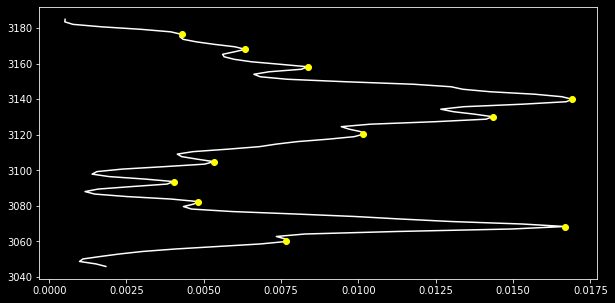

In [ ]:
peaks,_ = signal.find_peaks(kdy)
pkx = kdx[peaks]
pky = kdy[peaks]

plt.figure(figsize=(10,5))
# plt.hist(close, bins=num_samples, weights=volume, alpha=.8, color='#1592e6')
# plt.plot(kdx, kdy, color='white')
# plt.plot(pkx, pky, 'bo', color='yellow')
plt.plot(kdy, kdx, color='white')
plt.plot(pky, pkx, 'bo', color='yellow')
plt.show()

In [ ]:
pkx

array([3059.93252525, 3068.3640404 , 3082.41656566, 3093.65858586, 3104.90060606, 3120.35838384, 3130.19515152, 3140.03191919, 3158.30020202, 3168.1369697 , 3176.56848485])

In [ ]:
# ------ vp 의 indi. 화가 필요함 -> point 설정 ------ #
# 1. 4 level 은 미리 만들어놓는게 맞는걸로 보임 -> 추종하는 function 이 많음 (utils_tr, ep_out ...)
#   a. 4 level 에 국한하는게 아니라, 모든 peaks 에 대해 levels 설정
#   b. 각 session 별로 peak_list 가 주어질 것
#     i. prev_data 사용해야하는점 주의 (session vp 는 future_data)

#### legacy

In [ ]:
# import plotly.express as px
# import plotly.graph_objects as go

def get_dist_plot(c, v, kx, ky):
    fig = go.Figure()
    fig.add_trace(go.Histogram(name='Vol Profile', x=c, y=v, nbinsx=150, 
                               histfunc='sum', histnorm='probability density',
                               marker_color='#B0C4DE'))
    fig.add_trace(go.Scatter(name='KDE', x=kx, y=ky, mode='lines', marker_color='#D2691E'))    

    peaks,_ = signal.find_peaks(kdy)
    pkx = kdx[peaks]
    pky = kdy[peaks]
    pk_marker_args=dict(size=10, color='black')
    fig.add_trace(go.Scatter(name="Peaks", x=pkx, y=pky, mode='markers', marker=pk_marker_args))
    fig.show()

    return fig

##### prominence_info

In [ ]:
start_0 = time.time()
min_prom = kdy.max() * 0.0
pipsize = 0.01
max_width_pips = 20
# width_range=(1, max_width_pips * pipsize / ticks_per_sample)
width_range= max_width_pips * pipsize / ticks_per_sample
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom, width=width_range)

peak_x = kdx[peaks]
peak_y = kdy[peaks]
# ------ prominence lines ------ #
left_base = peak_props['left_bases']
right_base = peak_props['right_bases']
line_x = peak_x
line_y0 = peak_y
line_y1 = peak_y # - peak_props['prominences']
print("prom_line elapsed_time :", time.time() - start_0)


for x, y0, y1 in zip(line_x, line_y0, line_y1):
    fig.add_shape(type='line',
        xref='x', yref='y',
        # x0=x, y0=y0, x1=x, y1=y1,
        x0=x, y0=0, x1=x, y1=y1,
        line=dict(
            color='red',
            width=2,
        )
    )

# ------ width ------ #
left_ips = peak_props['left_ips']
right_ips = peak_props['right_ips']
# width_x0 = kdx.min() + (left_ips * ticks_per_sample)
# width_x1 = kdx.min() + (right_ips * ticks_per_sample)
width_x0 = kdx.min() + (left_base * ticks_per_sample)
width_x1 = kdx.min() + (right_base * ticks_per_sample)

# int_from = kdx.min() + (left_base * ticks_per_sample)
# int_to = kdx.min() + (right_base * ticks_per_sample)
# [kde.integrate_box_1d(x0, x1) for x0, x1 in zip(int_from, int_to)]

width_y = peak_props['width_heights']

for x0, x1, y in zip(width_x0, width_x1, width_y):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x0, y0=y, x1=x1, y1=y,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

prom_line elapsed_time : 0.0005087852478027344


In [ ]:
# peaks  # ndarray
# kdx  # ndarray
# kdy  # ndarray
# kdx.min()
left_base * ticks_per_sample
# volume

In [ ]:
print(peak_y)
print(peak_props['prominences'])
peak_props

### calc recursive indi's min_period

In [ ]:
ticker_prcn = get_precision_by_price(res_df.close.iloc[-1]) + 2

target_len = 300000
slice_len_list = list(range(50, 10000, 100))
slice_len_list.insert(0, target_len)

start_0 = time.time()
# prev_int_, prev_pnts_ = None, None
offset = 1

for sl_idx, sample_len in enumerate(slice_len_list):

  sample_df = res_df.iloc[-sample_len -offset:-offset]
  sample_len2 = sample_len

  # --------- input using indi.s --------- #
  # res = ema_v0(sample_df['close'], 190)
  res = rsi(sample_df, 14)

    #    to_htf()    #
  # df_5T = to_htf(sample_df, itv_='5T', offset='1h')
  # sample_len2 = len(df_5T)

  # # --------- input using htf_indi. --------- #
  # res = ema(df_5T['close'], 195)
  # -------------------------------------- #

  res_last_row = res.iloc[-1]
  if pd.isnull(res_last_row):
    continue

  # print(res_last_row)
  # break

  # sample_df = sample_df.join(to_lower_tf_v2(sample_df, df_5T, [-1]), how='inner')


  #   자리수 분할 계산    #
  int_, points_ = str(res_last_row).split('.')
  pnts_ = points_[:ticker_prcn]

  if sl_idx == 0:
    target_int_ = int_
    target_pnts_ = pnts_
    print("target {} ({}) -> {} {}".format(sample_len, sample_len2, int_, points_))

  else:
    if target_int_ == int_ and target_pnts_ == pnts_:
      # print(sample_len, "({})".format(sample_len2), '->', int_, pnts_, end='\n\n')
      print("{} ({}) -> {} {}\n".format(sample_len, sample_len2, int_, points_))
      break

print(time.time() - start_0)  # (1301)(1361)(1301)

NameError: ignored

## import utils & config

In [ ]:
frame_ver = "0114_htf"
ID_arr = np.array(['v3', 'v5_2'])

utils_public_name = "{}.utils.{}_utils_public".format(strat_pkg, frame_ver)
utils_public_lib = importlib.import_module(utils_public_name)
utils_public = utils_public_lib   # temporary

u_name_list = ["{}.utils.{}_utils_{}".format(strat_pkg, frame_ver, id_) for id_ in ID_arr]
utils_arr = np.array([importlib.import_module(u_name) for u_name in u_name_list])

config_name_list = ["{}_config_{}.json".format(frame_ver, id_) for id_ in ID_arr]
cfg_path_list = [os.path.join(current_path, strat_pkg, "config", name_) for name_ in config_name_list]
cfg_file_list = [open(cfg_path) for cfg_path in cfg_path_list]
config_arr = np.array([EasyDict(json.load(cfg_)) for cfg_ in cfg_file_list])

# ------ opened files should be closed --> 닫지 않으면 reopen 시 error occurs ------ #
_ = [cfg_.close() for cfg_ in cfg_file_list]
show_plot = 1   # idep's var - do not touch

### utils_

In [ ]:
# from funcs.funcs_indicator_candlescore import *
# import numpy as np


def get_line(touch, rtc_):
  nan_idx = np.isnan(touch)
  touch[nan_idx] = 0   # for indexing array
  short_a_line = rtc_.copy()
  short_a_line[touch.astype(int)]
  short_a_line[nan_idx] = np.nan   # for true comp.

  return short_a_line


def enlist_rtc(res_df, config, np_timeidx):
    strat_version = config.strat_version
    # ------------ rtc_gap ------------ #    
    short_rtc_1_, long_rtc_1_ = 'short_rtc_1_{}'.format(strat_version), 'long_rtc_1_{}'.format(strat_version)
    short_rtc_0_, long_rtc_0_ = 'short_rtc_0_{}'.format(strat_version), 'long_rtc_0_{}'.format(strat_version)

    period1, period2 = 20, 40
    res_df[short_rtc_1_] = res_df['dc_lower_{}{}'.format(config.loc_set.point.rtc_itv1, period1)]  # rtc 의 기준이 되어줌 (ei_k 도 포함)
    res_df[short_rtc_0_] = res_df['dc_upper_{}{}'.format(config.loc_set.point.rtc_itv0, period2)]
    res_df[long_rtc_1_] = res_df['dc_upper_{}{}'.format(config.loc_set.point.rtc_itv1, period1)]
    res_df[long_rtc_0_] = res_df['dc_lower_{}{}'.format(config.loc_set.point.rtc_itv0, period2)]

    # ------ inversion ------ #
    if config.pos_set.short_inversion or config.pos_set.long_inversion:
      res_df.rename({short_rtc_1_: long_rtc_1_, long_rtc_1_: short_rtc_1_}, axis=1, inplace=True)
      res_df.rename({short_rtc_0_: long_rtc_0_, long_rtc_0_: short_rtc_0_}, axis=1, inplace=True)

    res_df['short_rtc_gap_{}'.format(strat_version)] = abs(
        res_df[short_rtc_0_] - res_df[short_rtc_1_])
    res_df['long_rtc_gap_{}'.format(strat_version)] = abs(
        res_df[long_rtc_1_] - res_df[long_rtc_0_])
    
    # ------------ out_gap ------------ #
    # short_out_1_, long_out_1_ = 'short_out_1_{}'.format(strat_version), 'long_out_1_{}'.format(strat_version)
    # short_out_0_, long_out_0_ = 'short_out_0_{}'.format(strat_version), 'long_out_0_{}'.format(strat_version)
    # res_df[short_out_1_] = res_df['dc_lower_%s' % config.loc_set.point.outg_itv1]
    # res_df[short_out_0_] = res_df['dc_upper_%s' % config.loc_set.point.outg_itv0]   # outg 의 기준이 되어줌
    # res_df[long_out_1_] = res_df['dc_upper_%s' % config.loc_set.point.outg_itv1]
    # res_df[long_out_0_] = res_df['dc_lower_%s' % config.loc_set.point.outg_itv0]
    # # ------ inversion ------ #
    # if config.pos_set.short_inversion or config.pos_set.long_inversion:  # Todo - 추후 다른 변수로 변경해야함 (entry_score deprecated)
    #   res_df.rename({short_out_1_: long_out_1_, long_out_1_: short_out_1_}, axis=1, inplace=True)
    #   res_df.rename({short_out_0_: long_out_0_, long_out_0_: short_out_0_}, axis=1, inplace=True)

    # res_df['short_out_gap_{}'.format(strat_version)] = abs(
    #     res_df[short_out_0_] - res_df[short_out_1_])
    # res_df['long_out_gap_{}'.format(strat_version)] = abs(
    #     res_df[long_out_1_] - res_df[long_out_0_])
    
    # ------------ dtk_gap ------------ #
    res_df['short_dtk_1_{}'.format(strat_version)] = res_df['bb_lower_%s' % config.loc_set.zone.dtk_itv]
    res_df['short_dtk_0_{}'.format(strat_version)] = res_df['dc_upper_%s' % config.loc_set.zone.dtk_itv]
    res_df['long_dtk_1_{}'.format(strat_version)] = res_df['bb_upper_%s' % config.loc_set.zone.dtk_itv]
    res_df['long_dtk_0_{}'.format(strat_version)] = res_df['dc_lower_%s' % config.loc_set.zone.dtk_itv]

    res_df['short_dtk_gap_{}'.format(strat_version)] = abs(
        res_df['short_dtk_0_{}'.format(strat_version)] - res_df['short_dtk_1_{}'.format(strat_version)])
    res_df['long_dtk_gap_{}'.format(strat_version)] = abs(
        res_df['long_dtk_1_{}'.format(strat_version)] - res_df['long_dtk_0_{}'.format(strat_version)])

    return


def enlist_tr(res_df, config, np_timeidx, mode='OPEN'):
    strat_version = config.strat_version
    # ---------------- point definition : get open_res ---------------- #    
    len_df = len(res_df)
    short_open_res = np.ones(len_df)
    long_open_res = np.ones(len_df)
    
    short_rtc_1_col, short_rtc_0_col, short_rtc_gap_col = 'short_rtc_1_{}'.format(strat_version), 'short_rtc_0_{}'.format(strat_version), 'short_rtc_gap_{}'.format(strat_version) 
    long_rtc_1_col, long_rtc_0_col, long_rtc_gap_col = 'long_rtc_1_{}'.format(strat_version), 'long_rtc_0_{}'.format(strat_version), 'long_rtc_gap_{}'.format(strat_version) 

    data_cols = ['open', 'high', 'low']   # Todo - public_indi 이전에 해야할지도 모름 # 'close', 'haopen', 'hahigh', 'halow', 'haclose'
    rtc_cols = [short_rtc_1_col, short_rtc_0_col, short_rtc_gap_col, long_rtc_1_col, long_rtc_0_col, long_rtc_gap_col]   # Todo - public_indi 이전에 해야할지도 모름

    short_rtc_1_, short_rtc_0_, short_rtc_gap_, long_rtc_1_, long_rtc_0_, long_rtc_gap_ = [res_df[col_].to_numpy() for col_ in rtc_cols]
    open, high, low = [res_df[col_].to_numpy() for col_ in data_cols]
    short_base = (short_rtc_1_ + short_rtc_0_) / 2
    long_base = (long_rtc_1_ + long_rtc_0_) / 2
    # back_ha_o = res_df['haopen'].shift(1).to_numpy()
    # back_ha_c = res_df['haclose'].shift(1).to_numpy()

    touch_period = 50
    # short_open_res *= (back_ha_c >= back_ha_o) & (ha_o > ha_c)
    # short_open_res *= ha_o == ha_h
    # short_open_res *= np_timeidx % tf_entry == tf_entry - 1     
    short_a_touch = pd.Series(np.where(high >= short_rtc_0_, np.arange(len(res_df)), np.nan)).rolling(touch_period, min_periods=1).max().to_numpy()  # min -> max
    short_b_touch = pd.Series(np.where(low <= short_rtc_1_, np.arange(len(res_df)), np.nan)).rolling(touch_period, min_periods=1).max().to_numpy()   # min 으로 하면 a 이전에 b 있는건 모두 제외하게됨

    short_en_p = (get_line(short_a_touch, short_rtc_0_) + get_line(short_b_touch, short_rtc_1_)) / 2
    short_base_b = get_line(short_b_touch, short_base)
    short_rtc_gap_b = get_line(short_b_touch, short_rtc_gap_)
    short_open_res *= (high >= short_base_b) & (short_base_b >= open) & (short_a_touch < short_b_touch) & (short_base_b + config.loc_set.point.base_gap * short_rtc_gap_b >= short_base)
    
    res_df['short_open_{}'.format(strat_version)] = short_open_res

    # long_open_res *= (back_ha_c <= back_ha_o) & (ha_o < ha_c)          
    # long_open_res *= ha_o == ha_l
    # long_open_res *= np_timeidx % tf_entry == tf_entry - 1   
    long_a_touch = pd.Series(np.where(low <= long_rtc_0_, np.arange(len(res_df)), np.nan)).rolling(touch_period, min_periods=1).max().to_numpy()       
    long_b_touch = pd.Series(np.where(high >= long_rtc_1_, np.arange(len(res_df)), np.nan)).rolling(touch_period, min_periods=1).max().to_numpy()

    long_en_p = (get_line(long_a_touch, long_rtc_0_) + get_line(long_b_touch, long_rtc_1_)) / 2    
    long_base_b = get_line(long_b_touch, long_base)
    long_rtc_gap_b = get_line(long_b_touch, long_rtc_gap_)
    long_open_res *= (open >= long_base_b) & (long_base_b >= low) & (long_a_touch < long_b_touch) & (long_base_b - config.loc_set.point.base_gap * long_rtc_gap_b <= long_base)
    res_df['long_open_{}'.format(strat_version)] = long_open_res

    # ---------------- set ep level ---------------- #
    # -------- limit ver. -------- #
    base_period = 'T'
    if config.ep_set.entry_type == "LIMIT":
      # res_df['short_ep_{}'.format(strat_version)] = res_df['close'] + res_df['short_tp_gap_{}'.format(strat_version)] * config.tr_set.ep_gap
      # res_df['long_ep_{}'.format(strat_version)] = res_df['close'] - res_df['long_tp_gap_{}'.format(strat_version)] * config.tr_set.ep_gap    
      res_df['short_ep_{}'.format(strat_version)] = res_df['short_base_{}'.format(base_period)] + res_df['short_rtc_gap_{}'.format(strat_version)] * config.tr_set.ep_gap
      res_df['long_ep_{}'.format(strat_version)] = res_df['long_base_{}'.format(base_period)] - res_df['long_rtc_gap_{}'.format(strat_version)] * config.tr_set.ep_gap    
      # res_df['short_ep_{}'.format(strat_version)] = short_en_p + res_df['short_rtc_gap_{}'.format(strat_version)] * config.tr_set.ep_gap
      # res_df['long_ep_{}'.format(strat_version)] = long_en_p - res_df['long_rtc_gap_{}'.format(strat_version)] * config.tr_set.ep_gap      
    # -------- market ver. -------- #
    else:
        res_df['short_ep_{}'.format(strat_version)] = res_df['close']
        res_df['long_ep_{}'.format(strat_version)] = res_df['close']

    # -------- zoned_ep -------- #
    if config.tr_set.c_ep_gap != "None":
        # res_df['short_ep_org_{}'.format(strat_version)] = res_df['short_ep_{}'.format(strat_version)].copy()
        # res_df['long_ep_org_{}'.format(strat_version)] = res_df['long_ep_{}'.format(strat_version)].copy()
        res_df['short_ep2_{}'.format(strat_version)] = res_df['short_base_{}'.format(base_period)] + res_df[
            'short_rtc_gap_{}'.format(strat_version)] * config.tr_set.c_ep_gap
        res_df['long_ep2_{}'.format(strat_version)] = res_df['long_base_{}'.format(base_period)] - res_df[
            'long_rtc_gap_{}'.format(strat_version)] * config.tr_set.c_ep_gap

    # --------------- tp --------------- #    
    # res_df['short_tp_{}'.format(strat_version)] = res_df['close'] - res_df['short_tp_gap_{}'.format(strat_version)] * config.tr_set.tp_gap
    # res_df['long_tp_{}'.format(strat_version)] = res_df['close'] + res_df['long_tp_gap_{}'.format(strat_version)] * config.tr_set.tp_gap
    res_df['short_tp_{}'.format(strat_version)] = res_df['short_rtc_1_{}'.format(strat_version)] - res_df['short_rtc_gap_{}'.format(strat_version)] * (0.5 + config.tr_set.tp_gap) # 기본으로 .5 포함
    res_df['long_tp_{}'.format(strat_version)] = res_df['long_rtc_1_{}'.format(strat_version)] + res_df['long_rtc_gap_{}'.format(strat_version)] * (0.5 + config.tr_set.tp_gap)

    # --------------- out --------------- #
    # res_df['short_out_{}'.format(strat_version)] = res_df['high'] + res_df['short_out_gap_{}'.format(strat_version)] * config.tr_set.out_gap # open
    # res_df['long_out_{}'.format(strat_version)] = res_df['low'] - res_df['long_out_gap_{}'.format(strat_version)] * config.tr_set.out_gap  # open
    res_df['short_out_{}'.format(strat_version)] = res_df['short_rtc_0_{}'.format(strat_version)] + res_df['short_rtc_gap_{}'.format(strat_version)] * config.tr_set.out_gap
    res_df['long_out_{}'.format(strat_version)] = res_df['long_rtc_0_{}'.format(strat_version)] - res_df['long_rtc_gap_{}'.format(strat_version)] * config.tr_set.out_gap

    # -------- zoned_out -------- #
    if config.tr_set.t_out_gap != "None":
        # res_df['short_out_org_{}'.format(strat_version)] = res_df['short_out_{}'.format(strat_version)].copy()
        # res_df['long_out_org_{}'.format(strat_version)] = res_df['long_out_{}'.format(strat_version)].copy()
        res_df['short_out2_{}'.format(strat_version)] = res_df['short_rtc_0_{}'.format(strat_version)] + res_df['short_rtc_gap_{}'.format(strat_version)] * config.tr_set.t_out_gap
        res_df['long_out2_{}'.format(strat_version)] = res_df['long_rtc_0_{}'.format(strat_version)] - res_df['long_rtc_gap_{}'.format(strat_version)] * config.tr_set.t_out_gap

    # --------------- bias --------------- #  Todo - 추후, bias_set 독립시키는게 좋지 않을까
    end_tick = config.tr_set.end_tick
    # ------ bias_info can use future_data ------ #
    res_df['short_bias_info_{}'.format(strat_version)] = res_df['dc_lower_T'].shift(-end_tick)  # open / ep_tick 으로부터 end_tick 만큼
    res_df['long_bias_info_{}'.format(strat_version)] = res_df['dc_upper_T'].shift(-end_tick)

    # bias_thresh 는 결국 tp 가 될 것
    res_df['short_bias_thresh_{}'.format(strat_version)] = res_df['short_tp_{}'.format(strat_version)]
    res_df['long_bias_thresh_{}'.format(strat_version)] = res_df['long_tp_{}'.format(strat_version)]
    # res_df['short_bias_thresh_{}'.format(strat_version)] = res_df['dc_lower_T'] - res_df['short_tp_gap_{}'.format(strat_version)] * config.tr_set.bias_gap
    # res_df['long_bias_thresh_{}'.format(strat_version)] = res_df['dc_upper_T'] + res_df['long_tp_gap_{}'.format(strat_version)] * config.tr_set.bias_gap 
        
    return


### utils_public

In [29]:
# from funcs.funcs_indicator import *
# from funcs.funcs_trader import *
# import logging
# from ast import literal_eval

sys_log = logging.getLogger()


class OrderSide:
    BUY = "BUY"
    SELL = "SELL"
    INVALID = None


def lvrg_set(res_df, config, open_side, ep_, out_, fee, limit_leverage=50):
    strat_version = config.strat_version
    if not pd.isnull(out_) and not config.lvrg_set.static_lvrg:
      if strat_version in ['v3']:
        if open_side == OrderSide.SELL:
          loss = out_ / ep_
        else:
          loss = ep_ / out_
      else:  # 이 phase 가 정석, 윗 phase 는 결과가 수익 극대화라 사용함
        if open_side == OrderSide.SELL:
          loss = ep_ / out_          
        else:
          loss = out_ / ep_

        config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(loss - 1 - (fee + config.trader_set.market_fee))

    if not config.lvrg_set.allow_float:
        config.lvrg_set.leverage = int(config.lvrg_set.leverage)

    # ------------ leverage rejection ------------ #
    # 감당하기 힘든 fluc. 의 경우 진입하지 않음 - dynamic_lvrg 사용 경우
    if config.lvrg_set.leverage < 1 and config.lvrg_set.lvrg_rejection:
    # if config.lvrg_set.leverage >= 1 and config.lvrg_set.lvrg_rejection:
        return None
    config.lvrg_set.leverage = min(limit_leverage, max(config.lvrg_set.leverage, 1))

    return config.lvrg_set.leverage


def sync_check(df_, config, order_side="OPEN", row_slice=True):
    try:
        make_itv_list = [m_itv.replace('m', 'T') for m_itv in literal_eval(config.trader_set.itv_list)]
        row_list = literal_eval(config.trader_set.row_list)
        rec_row_list = literal_eval(config.trader_set.rec_row_list)
        offset_list = literal_eval(config.trader_set.offset_list)

        assert len(make_itv_list) == len(offset_list), "length of itv & offset_list should be equal"
        htf_df_list = [to_htf(df_, itv_=itv_, offset=offset_) for itv_idx, (itv_, offset_)
                       in enumerate(zip(make_itv_list, offset_list)) if itv_idx != 0]  #
        htf_df_list.insert(0, df_)

        # for htf_df_ in htf_df_list:
        #     print(htf_df_.tail())

        #       Todo        #
        #        1. row_list calc.
        #           a. indi. 를 만들기 위한 최소 period 가 존재하고, 그 indi. 를 사용한 lb_period 가 존재함
        #           b. => default_period + lb_period
        #               i. from sync_check, public_indi, ep_point2, ep_dur 의 tf 별 max lb_period check
        #                   1. default_period + max lb_period check
        #                       a. 현재까지 lb_period_list
        #                           h_prev_idx (open / close) 60
        #                           dc_period 135
        #                           zone_dc_period 135

        # --------- slicing (in trader phase only) --------- #
        #               --> latency 영향도가 높은 곳은 이곳
        if row_slice:   # recursive 가 아닌 indi. 의 latency 를 고려한 slicing
            df, df_5T, df_15T, df_30T, df_4H = [df_s.iloc[-row_list[row_idx]:].copy() for row_idx, df_s in enumerate(htf_df_list)]
            rec_df, rec_df_5T, rec_df_15T, rec_df_30T, rec_df_4H = [df_s.iloc[-rec_row_list[row_idx]:].copy() for row_idx, df_s in enumerate(htf_df_list)]
        else:
            df, df_5T, df_15T, df_30T, df_4H = htf_df_list
            rec_df, rec_df_5T, rec_df_15T, rec_df_30T, rec_df_4H = htf_df_list

        # --------- add indi. --------- #

        #        1. 필요한 indi. 는 enlist_epouttp & mr_check 보면서 삽입
        #        2. min use_rows 계산을 위해서, tf 별로 gathering 함        #
        start_0 = time.time()

        df = dc_line(df, None, '1m', dc_period=20)
        df = bb_line(df, None, '1m')
        # print(df.tail())

        df = dc_line(df, df_5T, '5T')
        df = bb_line(df, df_5T, '5T')

        df = dc_line(df, df_15T, '15T')
        df = bb_line(df, df_15T, '15T')

        df = bb_line(df, df_30T, '30T')

        # print(time.time() - start_0)

        # start_0 = time.time()
        df = bb_line(df, df_4H, '4H')
        # print(time.time() - start_0)

        rec_df['rsi_1m'] = rsi(rec_df, 14)  # Todo - recursive, 250 period
        df = df.join(to_lower_tf_v2(df, rec_df.iloc[:, [-1]], [-1], backing_i=0), how='inner')  # <-- join same_tf manual
        # print(df.rsi_1m.tail())

        if order_side in ["OPEN"]:
            rec_df_5T['ema_5T'] = ema(rec_df_5T['close'], 195)  # Todo - recursive, 1100 period (5T)
            df = df.join(to_lower_tf_v2(df, rec_df_5T, [-1]), how='inner')

    except Exception as e:
        sys_log.error("error in sync_check :", e)
    else:
        return df


def public_indi(res_df, config, np_timeidx, order_side="OPEN"):

    strat_version = config.strat_version
    res_df = dc_level(res_df, '5T', 1)
    res_df = bb_level(res_df, '5T', 1)
    # res_df = st_level(res_df, '5T', 1)

    res_df = dc_level(res_df, '15T', 1)
    res_df = bb_level(res_df, '15T', 1)
    res_df = dtk_plot(res_df, dtk_itv2='15T', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line, np_timeidx=np_timeidx)

    # res_df = st_level(res_df, '15T', 1)

    # res_df = dc_level(res_df, '30T', 1)
    # res_df = bb_level(res_df, '30T', 1)
    # res_df = st_level(res_df, '30T', 1)

    # res_df = bb_level(res_df, 'H', 1)

    res_df = bb_level(res_df, '4H', 1)

    res_df['dc_upper_v2'.format(strat_version)] = res_df['high'].rolling(config.loc_set.zone.dc_period).max()
    res_df['dc_lower_v2'.format(strat_version)] = res_df['low'].rolling(config.loc_set.zone.dc_period).min()

    res_df['zone_dc_upper_v2'.format(strat_version)] = res_df['high'].rolling(config.loc_set.zone.zone_dc_period).max()
    res_df['zone_dc_lower_v2'.format(strat_version)] = res_df['low'].rolling(config.loc_set.zone.zone_dc_period).min()

    if order_side in ["OPEN"]:
        # start_0 = time.time()
        candle_score_v2(res_df, 'T', unsigned=False)
        # print("~ wick_score() elapsed time : {}".format(time.time() - start_0))

        # start_0 = time.time()
        h_candle_v3(res_df, '15T')
        h_candle_v3(res_df, 'H')
        # sys_log.warning("~ h_wick_score elapsed time : {}".format(time.time() - start_0))
        # print("wick_score() ~ h_candle() elapsed time : {}".format(time.time() - start_0))

        hc_itv = 'H'
        h_candle_col = ['open_{}'.format(hc_itv), 'high_{}'.format(hc_itv), 'low_{}'.format(hc_itv), 'close_{}'.format(hc_itv)]
        candle_score_v2(res_df, hc_itv, ohlc_col=h_candle_col, unsigned=False)

    #     temp indi.    #
    # res_df["ma30_1m"] = res_df['close'].rolling(30).mean()
    # res_df["ma60_1m"] = res_df['close'].rolling(60).mean()
    # res_df = dtk_plot(res_df, dtk_itv2='15T', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line, np_timeidx=np_timeidx)

    return

def ep_out(res_df, config, op_idx, e_j, tp_j, np_datas, open_side):  
  h, l = np_datas
  strat_version = config.strat_version
  ep_out = 0
  
  if strat_version in ['v3_4']:
    if e_j - op_idx >= config.ep_set.ep_out_tick:
      ep_out = 1
  else:
    if open_side == OrderSide.SELL:
      short_rtc_1_ = res_df['short_rtc_1_{}'.format(strat_version)].to_numpy()  # id 에 따라 dynamic 변수라 이곳에서 numpy 화 진행
      short_rtc_gap_ = res_df['short_rtc_gap_{}'.format(strat_version)].to_numpy()
      if l[e_j] <= short_rtc_1_[tp_j] - short_rtc_gap_[tp_j] * config.ep_set.ei_k:
        ep_out = 1
    else:
      long_rtc_1_ = res_df['long_rtc_1_{}'.format(strat_version)].to_numpy()  # iloc 이 빠를까, to_numpy() 가 빠를까  # 3.94 ms --> 5.34 ms (iloc)
      long_rtc_gap_ = res_df['long_rtc_gap_{}'.format(strat_version)].to_numpy()
      if h[e_j] >= long_rtc_1_[tp_j] + long_rtc_gap_[tp_j] * config.ep_set.ei_k:
        ep_out = 1
  
  return ep_out

def ep_loc_point2(res_df, config, i, out_j, point2_list, side=OrderSide.SELL):
  dc_upper_1T, dc_upper_15T, dc_lower_1T, dc_lower_15T, close, resi_T, sup_T, wick_score = point2_list
  allow_ep_in = 1
  if config.strat_version in ['v5_2']:
    if side == OrderSide.SELL:
      allow_ep_in *= (dc_upper_1T[i - 1] <= dc_upper_15T[i]) & \
            (dc_upper_15T[i - 1] != dc_upper_15T[i])
    else:
      allow_ep_in *= (dc_lower_1T[i - 1] >= dc_lower_15T[i]) & \
              (dc_lower_15T[i - 1] != dc_lower_15T[i])

  if config.strat_version in ['v3_4']:
    wick_score_list = literal_eval(config.ep_set.point2.wick_score_list)
    if side == OrderSide.SELL:
      allow_ep_in *= close[i] < sup_T[i - 1]
      if len(wick_score_list) != 0:
        allow_ep_in *= wick_score[i] < -wick_score_list[0]
    else:
      allow_ep_in *= close[i] > resi_T[i - 1]
      if len(wick_score_list) != 0:
        allow_ep_in *= wick_score[i] > wick_score_list[0]

  if allow_ep_in:
    out_j = i
  return allow_ep_in, out_j


# vectorized calc.
def ep_loc_v2(res_df, config, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL):
    strat_version = config.strat_version

    # ------- param init ------- #
    open_side = None
    len_df = len(res_df)
    mr_res = np.ones(len_df)
    zone_arr = np.full(len_df, 'n')

    # ------ process 한번에 처리해서 param_check 만 ver. 별로 하면 될 것 ------ #
    #     => public_indi() 가 될 것
    #     1. 사용한 param 정보와 matching 된 data 병렬로 나열 logging 될 것
    tp_fee, out_fee = calc_tp_out_fee_v2(config)

    # ------------ candle_score ------------ #    
    wick_score_list = literal_eval(config.loc_set.point.wick_score_list)
    if len(wick_score_list) != 0:
      score_itv_list = literal_eval(config.loc_set.point.score_itv_list)
      # ------ candle_score_v0 (1m initial tick 기준임) ------ #  Todo - higher timeframe 경우 back_data 사용해야함
      for wick_score_, score_itv_ in zip(wick_score_list, score_itv_list):
        wick_score = res_df['wick_score_{}'.format(score_itv_)].to_numpy()
        if ep_loc_side == OrderSide.SELL:
          mr_res *= wick_score <= -wick_score_
        else:
          mr_res *= wick_score >= wick_score_

    # -------------- spread scheduling -------------- #
    if config.loc_set.zone.short_spread != "None":
      bb_base_5T = res_df['bb_base_5T'].to_numpy()  # to_numpy() 는 ep_loc 에서 진행됨
      bb_lower_5T = res_df['bb_lower_5T'].to_numpy()
      bb_upper_5T = res_df['bb_upper_5T'].to_numpy()
      dc_lower_5T = res_df['dc_lower_5T'].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= (bb_base_5T - bb_lower_5T - tp_fee * bb_base_5T) / (bb_base_5T - bb_lower_5T + out_fee * bb_base_5T) >= config.loc_set.zone.short_spread
      else:
        # mr_res *= (bb_base_5T - dc_lower_5T - tp_fee * bb_upper_5T) / (bb_base_5T - dc_lower_5T + out_fee * bb_base_5T) >= config.loc_set.zone.long_spread
        mr_res *= (bb_upper_5T - dc_lower_5T - tp_fee * bb_upper_5T) / (bb_upper_5T - dc_lower_5T + out_fee * bb_upper_5T) >= config.loc_set.zone.long_spread

    # -------------- dtk -------------- #
    if config.loc_set.zone.dt_k != "None":
      # ------ dc_v2 ------ #
      dc_lower_v2 = res_df['dc_lower_v2'.format(strat_version)].to_numpy()
      short_dtk_1_ = res_df['short_dtk_1_{}'.format(strat_version)].to_numpy() - \
              res_df['short_dtk_gap_{}'.format(strat_version)].to_numpy() * config.loc_set.zone.dt_k
      dc_upper_v2 = res_df['dc_upper_v2'.format(strat_version)].to_numpy()
      long_dtk_1_ = res_df['long_dtk_1_{}'.format(strat_version)].to_numpy() + \
              res_df['long_dtk_gap_{}'.format(strat_version)].to_numpy() * config.loc_set.zone.dt_k
      if ep_loc_side == OrderSide.SELL:
        mr_res *= dc_lower_v2 >= short_dtk_1_
      else:
        mr_res *= dc_upper_v2 <= long_dtk_1_

    # ------------ zone rejection  ------------ #
    # config 로 통제할 수 없는 rejection 은 strat_version 으로 조건문을 나눔 (lvrg_set 과 동일)
    if config.loc_set.zone.zone_rejection:        
        # ------ envel. ------ #
        # ep_loc check 기준 idx 가 entry 기준이라는 걸 명심
        if strat_version in ['v3_2']:
          hc_itv = '15T'
          dc_itv = '15T'
          shift_num = [0, to_itvnum(hc_itv)]
          div_res = [1, 0]
          for itv_num, res in zip(shift_num, div_res):
            close_ = res_df['close_{}'.format(hc_itv)].shift(itv_num).to_numpy()  # close_bar timein 사용하는 경우, 특수로 shift(0) 사용가능
            if ep_loc_side == OrderSide.SELL:
              dc_lower_ = res_df['dc_lower_%s' % dc_itv].shift(itv_num).to_numpy()
              mr_res *= (close_ < dc_lower_) == res
            else:
              dc_upper_ = res_df['dc_upper_%s' % dc_itv].shift(itv_num).to_numpy()
              mr_res *= (close_ > dc_upper_) == res

        # if strat_version in ['v3_3', 'v3_4']:
        #   hc_itv = '15T'
        #   dc_itv = '15T'
        #   itv_num = to_itvnum(hc_itv)
        #   close_ = res_df['close_{}'.format(hc_itv)].shift(itv_num).to_numpy()   # 따라서 future_data 사용시, shifting 필요함
        #   if ep_loc_side == OrderSide.SELL:
        #     dc_lower_ = res_df['dc_lower_%s' % dc_itv].shift(itv_num).to_numpy()
        #     mr_res *= close_ < dc_lower_
        #   else:
        #     dc_upper_ = res_df['dc_upper_%s' % dc_itv].shift(itv_num).to_numpy()
        #     mr_res *= close_ > dc_upper_

        # ------ degree ------ #
        # if strat_version in ['v3_3', 'v3_4']:
        #   norm_close_15 = res_df['norm_close_15'].to_numpy()
        #   b1_norm_close_15 = res_df['norm_close_15'].shift(15).to_numpy()
        #   degree_list = literal_eval(config.loc_set.zone.degree_list)
        #   if ep_loc_side == OrderSide.SELL:
        #     mr_res *= norm_close_15 <= -degree_list[0]
        #     # mr_res *= b1_norm_close_15 <= -degree_list[1]
        #   else:
        #     mr_res *= norm_close_15 >= degree_list[0]
        #     # mr_res *= b1_norm_close_15 >= degree_list[1]

        # ------ bb ------ #
        close = res_df['close'].to_numpy()

        # if strat_version in ['v3_3']:
        #   open = res_df['open'].to_numpy()
        #   if ep_loc_side == OrderSide.SELL:
        #     bb_lower_1m = res_df['bb_lower_1m'].to_numpy()
        #     # mr_res *= close <= bb_lower_1m
        #     mr_res *= open <= bb_lower_1m
        #   else:
        #     bb_upper_1m = res_df['bb_upper_1m'].to_numpy()
        #     # mr_res *= close >= bb_upper_1m
        #     mr_res *= open >= bb_upper_1m

        if strat_version in ['v5_2']:
          bb_upper2_ = res_df['bb_upper2_%s' % config.loc_set.zone.bbz_itv].to_numpy()
          bb_lower2_ = res_df['bb_lower2_%s' % config.loc_set.zone.bbz_itv].to_numpy()
          if ep_loc_side == OrderSide.SELL:
            mr_res *= bb_upper2_ < close
          else:
            mr_res *= bb_lower2_ > close

        # ------ dc ------ #        
        # if strat_version in ['v3_3']:
        #   if ep_loc_side == OrderSide.SELL:
        #     dc_lower_ = res_df['dc_lower_1m'].to_numpy()
        #     b1_dc_lower_ = res_df['dc_lower_1m'].shift(1).to_numpy()
        #     mr_res *= dc_lower_ < b1_dc_lower_
        #   else:
        #     dc_upper_ = res_df['dc_upper_1m'].to_numpy()
        #     b1_dc_upper_ = res_df['dc_upper_1m'].shift(1).to_numpy()
        #     mr_res *= dc_upper_ > b1_dc_upper_

        # ------ sar ------ #
        # if strat_version in ['v3_3']:
          # sar_uptrend_3T = res_df['sar_uptrend_3T'].to_numpy()
          # if ep_loc_side == OrderSide.SELL:
          #   mr_res *= sar_uptrend_3T == 0
          # else:
          #   mr_res *= sar_uptrend_3T == 1

        # ------ ema ------ #
        if strat_version in ['v5_2']: # 'v3'
          ema_5T = res_df['ema_5T'].to_numpy()
          if ep_loc_side == OrderSide.SELL:
            mr_res *= close < ema_5T
          else:
            mr_res *= close > ema_5T

    # -------------- zoned tr_set - post_work -------------- #
    if config.tr_set.c_ep_gap != "None" or config.tr_set.t_out_gap != "None":
        #       by zone_dtk       #
        #         c_zone        #
        zone_dc_upper_v2_ = res_df['zone_dc_upper_v2'.format(strat_version)].to_numpy()
        long_dtk_plot_1 = res_df['long_dtk_plot_1'].to_numpy() + res_df['long_dtk_plot_gap'].to_numpy() * config.loc_set.zone.zone_dt_k
        zone_dc_lower_v2_ = res_df['zone_dc_lower_v2'.format(strat_version)].to_numpy()
        short_dtk_plot_1 = res_df['short_dtk_plot_1'].to_numpy() - res_df['short_dtk_plot_gap'].to_numpy() * config.loc_set.zone.zone_dt_k
        if ep_loc_side == OrderSide.SELL:
          zone_res = zone_dc_upper_v2_ > long_dtk_plot_1  # mr_res 와는 별개임
          pos = 'short'
        else:
          zone_res = zone_dc_lower_v2_ < short_dtk_plot_1
          pos = 'long'

        # static 여부에 따른 vectorized adj. - dynamic 은 vectorize 불가
        if config.ep_set.static_ep and config.tr_set.c_ep_gap != "None":
          res_df['{}_ep_{}'.format(pos, strat_version)][zone_res] = res_df['{}_ep2_{}'.format(pos, strat_version)][zone_res]
        if config.out_set.static_out and config.tr_set.t_out_gap != "None":
          res_df['{}_out_{}'.format(pos, strat_version)][~zone_res] = res_df['{}_out2_{}'.format(pos, strat_version)][~zone_res]  # t_zone 에 대한 out2 setting 
        zone_arr = np.where(zone_res == 1, 'c', 't')

    return mr_res, zone_arr  # mr_res 의 True idx 가 open signal

### set config (override available)

In [ ]:
#     caution : MARKET / LIMIT spelling   #
#      json doesn't support single quotes     #

param_dict = \
{
  "strat_version": "v3_5",
  "trader_set": {
    "run": 1,
    "df_log": 0,
    "open_index": -1,
    "complete_index": -2,
    "limit_fee": 0.0002,
    "market_fee": 0.0004,
    "initial_asset": 3500,
    "asset_changed": 0,
    "symbol": "ETHUSDT",
    "symbol_changed": 0,
    "itv_list": "['T', '5T', '15T', '30T', '4H']",
    "row_list": "[200, 160, 30, 25, 25]",
    "rec_row_list": "[250, 1100, 1, 1, 1]",
    "offset_list": "['1h', '1h', '1h', '1h', '1h']",
    "bar_close_second": 59,
    "realtime_term": 0.01,
    "api_retry_term": 3,
    "check_entry_sec": 10,
    "entry_execution_wait": 60,
    "breakout_qty_ratio": 0.97,
    "qty_check_term": 30,
    "exit_execution_wait": 60,
    "close_complete_term": 5,
    "save_stacked_df": 0,
    "stacked_df_exist": 1
  },
  "pos_set": {
    "short_inversion": 0,
    "long_inversion": 0,
    "short_ban": 1,
    "long_ban": 0
  },
  "loc_set": {
    "zone": {
      "short_spread": "None",
      "long_spread": "None",
      "tr_thresh": "None",
      "dtk_itv": "5T",
      "dt_k": "None",
      "dc_period": 135,
      "use_dtk_line": 0,
      "zone_rejection": 1,
      "degree_list": "[50, 0]",
      "gap_mply": 1,
      "hc_itv": 60,
      "bbz_itv": "None",
      "zone_dt_k": 0.4,
      "zone_dc_period": 135
    },
    "point": {
      "exp_itv": "5T",
      "rtc_itv1": "T",
      "rtc_itv0": "T",
      "tf_entry": 5,
      "base_gap": 0.1,
      "wick_score_list": "[]",
      "body_score_list": "[]",
      "score_itv_list": "[]",      
      "osc_band": 20
    }
  },
  "tr_set": {
    "ep_gap": 0,
    "tp_gap": 0,
    "decay_gap": "None",
    "out_gap": 0,
    "c_ep_gap": "None",
    "t_out_gap": "None",
    "bias_gap": 0,
    "end_tick": 500
  }, 
  "ep_set": {
    "entry_type": "LIMIT",
    "static_ep": 1,
    "ei_k": 0.36,
    "ep_out_tick": 20,    
    "point2": {
      "use_point2": 0,
      "entry_type": "MARKET",
      "wick_score_list": "[]",
      "body_score_list": "[]",
      "score_itv_list": "['T']"
    }
  },
  "tp_set": {
    "non_tp": 0,
    "static_tp": 1,
    "tp_onexec": 0,
    "decay_term": 60,
    "partial_num": 1,
    "partial_qty_divider": 1.5
  },
  "out_set": {
    "hl_out": 1,
    "static_out": 1,
    "out_onexec": 0,
    "tf_exit": "None",
    "rsi_exit": 0
  },
  "lvrg_set": {
    "leverage": 2,
    "static_lvrg": 1,
    "allow_float": 0,
    "target_pct": 0.12,
    "lvrg_rejection": 0
  }
}

config = EasyDict(param_dict)
# param_json = json.dumps(param_dict, indent=2)

#### save config

In [ ]:
config_name = "config_v5_2.1220_candlejson"
# config_name = "config_v3.json"
cfg_full_path = os.path.join(current_path, "config", config_name)


with open(cfg_full_path, 'w') as cfg:
    json.dump(config1, cfg, indent=2)
    print("{} dumped !".format(cfg_full_path))

/content/drive/My Drive/Colab Notebooks/JnQ/config/config_v5_2.1220_candlejson dumped !


## run

In [32]:
funcs = [ep_out, ep_loc_point2, lvrg_set]

id_idx_list = [0]  # ID_arr 에서 import 할 id_idx 선택
public_override = 1
utils_override = 1
config_override = 1

# ------ config_list 와 같은 org_var 에 override 하는거 다시 생각하기 ------ #
ID_list = ID_arr[id_idx_list]
utils_list = utils_arr[id_idx_list]
config_list = config_arr[id_idx_list]

if config_override or utils_override:
  assert len(config_list) == 1
  if config_override:
    config_list[0] = config
    ID_list[0] = config.strat_version
  
config = config_list[0]  # base config = config_list[0]
tp_fee, out_fee = calc_tp_out_fee_v2(config)   # -> rev_pr 때문에 일단 이곳에도 선언함

# ------- inversion set ------- #
inversion = 0
fdist_thresh = 1
# ------- plot param ------- #
show_detail = 0
# ------- temp param ------- #
allow_osc_touch = 0
rsi_gap = 5
early_out_tpg = 0.36

# ------- just printing config ------- #
# ['strat_version', 'pos_set', 'loc_set', 'tr_set', 'ep_set', 'tp_set', 'out_set', 'lvrg_set']
_ = [print(json.dumps(config[key_], indent=1), end=' ') for key_ in ['strat_version', 'loc_set', 'tr_set', 'ep_set', 'tp_set', 'out_set', 'lvrg_set']]

"v3_5" {
 "zone": {
  "short_spread": "None",
  "long_spread": "None",
  "tr_thresh": "None",
  "dtk_itv": "5T",
  "dt_k": "None",
  "dc_period": 135,
  "use_dtk_line": 0,
  "zone_rejection": 1,
  "degree_list": "[50, 0]",
  "gap_mply": 1,
  "hc_itv": 60,
  "bbz_itv": "None",
  "zone_dt_k": 0.4,
  "zone_dc_period": 135
 },
 "point": {
  "exp_itv": "5T",
  "rtc_itv1": "T",
  "rtc_itv0": "T",
  "tf_entry": 5,
  "base_gap": 0.1,
  "wick_score_list": "[]",
  "body_score_list": "[]",
  "score_itv_list": "[]",
  "osc_band": 20
 }
} {
 "ep_gap": 0,
 "tp_gap": 0,
 "decay_gap": "None",
 "out_gap": 1.48,
 "c_ep_gap": "None",
 "t_out_gap": "None",
 "bias_gap": 0,
 "end_tick": 500
} {
 "entry_type": "LIMIT",
 "static_ep": 1,
 "ei_k": 0.36,
 "ep_out_tick": 20,
 "point2": {
  "use_point2": 0,
  "entry_type": "MARKET",
  "wick_score_list": "[]",
  "body_score_list": "[]",
  "score_itv_list": "['T']"
 }
} {
 "non_tp": 0,
 "static_tp": 1,
 "tp_onexec": 0,
 "decay_term": 60,
 "partial_num": 1,
 "partial

In [33]:
# ------ slicing res_df ------ #
res_df = res_df_.loc[pd.to_datetime("2020-09-05 00:00:59.999"):] # pd.to_datetime("2022-01-10 00:00:59.999"), pd.to_datetime("2021-10-04 02:39:59.999000")

np_timeidx = np.array([intmin_np(date_) for date_ in res_df.index.to_numpy()])

# ------------ public_indi ------------ # - 딱히 반복될 이유가 없는 phase - annot. 달때, why 까지 적어주면 좋음
start_0 = time.time()
if public_override:
    public_indi(res_df, config, np_timeidx)  # 현재 대부분의 시간은 h_candle 에서 소비되고 있음
else:
    utils_public.public_indi(res_df, config, np_timeidx)
print("public_indi elapsed time :", time.time() - start_0)

# ------------ make data_list ------------ # - 반복될 이유가 없는 phase - public_indo 에 종속
start_0 = time.time()
ohlc_cols = ['open', 'high', 'low', 'close']
ohlc_list = [res_df[col_].to_numpy() for col_ in ohlc_cols]
point2_cols = ['dc_upper_T', 'dc_upper_15T', 'dc_lower_T', 'dc_lower_15T', 'close', 'resi_T', 'sup_T'] + ['wick_score_{}'.format(s_itv) for s_itv in literal_eval(config.ep_set.point2.score_itv_list)]
point2_list = [res_df[col_].to_numpy() for col_ in point2_cols]
market_data_cols = ['close', 'bb_lower_5T', 'bb_upper_5T', 'rsi_T', 'haopen', 'hahigh', 'halow', 'haclose']   # Todo - public_indi 이전에 해야할지도 모름
market_data_list = [res_df[col_].to_numpy() for col_ in market_data_cols]
print("make data_list elapsed time :", time.time() - start_0)

public_indi elapsed time : 1.2841153144836426
make data_list elapsed time : 0.0011584758758544922


### idep_plot

In [34]:
# ------ edit utils config ------ #
# config_list[0].loc_set.point.base_gap = -0.0
# config_list[0].tr_set.ep_gap = 0.5
# # # config_list[0].tr_set.tp_gap = 0.5
config_list[0].tr_set.out_gap = 1.48
# config_list[0].tr_set.bias_gap = 1.5
# #  rs_channel_v2(res_df_, period=6, itv='T', type='OUT')

In [35]:
if utils_override:   # 현재, utils_override 하는 경우 1개의 ID 만 허용함 
  start_0 = time.time()
  enlist_rtc(res_df, config, np_timeidx)
  print("enlist_rtc elapsed time :", time.time() - start_0)
  start_0 = time.time()
  enlist_tr(res_df, config, np_timeidx)    
  print("enlist_tr elapsed time :", time.time() - start_0)
else:
    start_0 = time.time()
    for utils_, config_ in zip(utils_list, config_list):
        utils_.enlist_rtc(res_df, config_, np_timeidx)
        utils_.enlist_tr(res_df, config_, np_timeidx)
    print("elapsed time :", time.time() - start_0)

enlist_rtc elapsed time : 0.03418779373168945
enlist_tr elapsed time : 0.18780779838562012


In [ ]:
# ------ edit loc_set config ------ #


In [36]:
open_info_df = get_open_info_df(ep_loc_v2, res_df, np_timeidx, ID_list, config_list, id_idx_list)  # --> point & dur. 관련 (loc_set) param 에 종속 (open_info 가 변경되는게 아니라면, 재실행할 필요없음)

get_open_info_df elapsed time : 1.0486364364624023


In [ ]:
# ------ edit entry & exit (ep, tp, out, ..) config ------ #
# config_list[0].ep_set.ei_k = 0.5
# config_list[0].ep_set.ep_out_tick = 20
# config_list[0].ep_set.point2.use_point2 = 1
# config_list[0].ep_set.point2.entry_type = "LIMIT"
# config_list[0].ep_set.point2.wick_score_list = str([])
# config_list[0].tp_set.static_tp = 1
# config_list[0].tp_set.non_tp = 0 # 0 1
# config_list[0].out_set.hl_out = 1
# config_list[0].out_set.tf_exit = "None" # 15 "None"
config_list[0].lvrg_set.static_lvrg = 0
config_list[0].lvrg_set.target_pct = 0.01
config_list[0].lvrg_set.lvrg_rejection = 1
# config_list[0].lvrg_set.leverage = 2

en_ex_pairing elapsed time : 1.9484944343566895
short_obj.shape : (181, 5)
long_obj.shape : (170, 5)


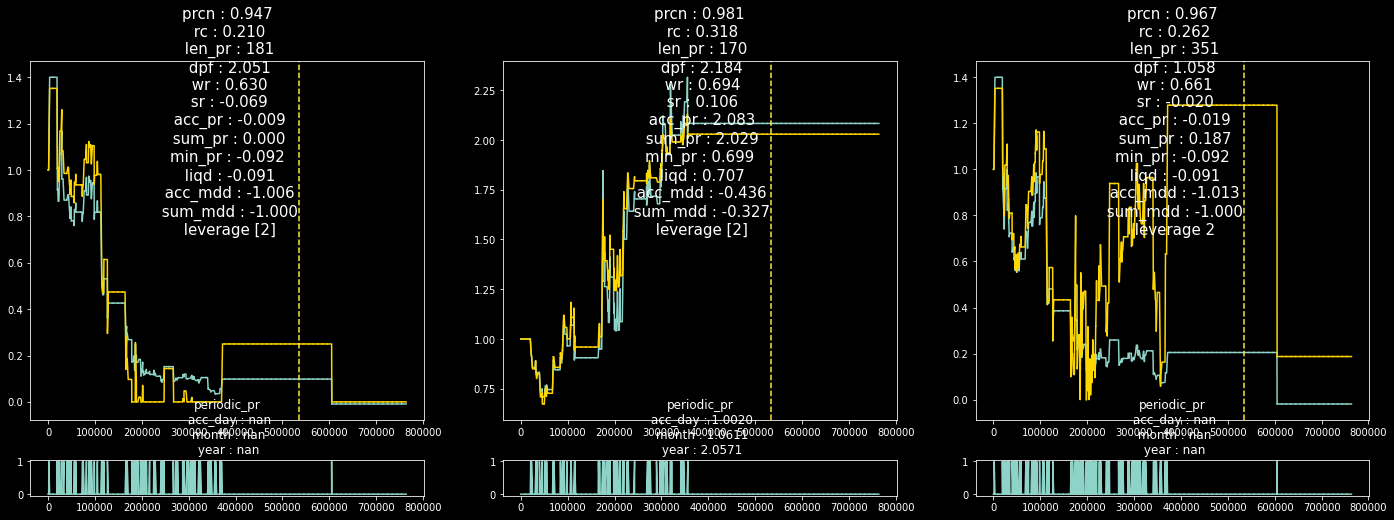

idep_plot_v6 elapsed time : 1.5016164779663086


In [37]:
short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_bias_arr, long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_bias_arr = \
get_res(res_df, open_info_df, ohlc_list, point2_list, market_data_list, config_list, np_timeidx, funcs, test_ratio=0.3, plot_is=1, signi=False)   # open 이 많을 수록 en_ex_pairing elapsed time : 11.58370590209961

### significance_v2

en_ex_pairing elapsed time : 3.651292562484741
short_obj.shape : (3435, 5)
long_obj.shape : (2796, 5)
idep_plot_v6 elapsed time : 0.4078540802001953
en_ex_pairing elapsed time : 1.5504961013793945
short_obj.shape : (3312, 5)
long_obj.shape : (2682, 5)
idep_plot_v6 elapsed time : 0.28289341926574707
en_ex_pairing elapsed time : 1.6230182647705078
short_obj.shape : (3228, 5)
long_obj.shape : (2608, 5)
idep_plot_v6 elapsed time : 0.28797125816345215
en_ex_pairing elapsed time : 1.4132130146026611
short_obj.shape : (3145, 5)
long_obj.shape : (2558, 5)
idep_plot_v6 elapsed time : 0.25912976264953613
en_ex_pairing elapsed time : 1.416189432144165
short_obj.shape : (3084, 5)
long_obj.shape : (2494, 5)
idep_plot_v6 elapsed time : 0.2473134994506836
en_ex_pairing elapsed time : 1.42384672164917
short_obj.shape : (3009, 5)
long_obj.shape : (2446, 5)
idep_plot_v6 elapsed time : 0.2582120895385742
en_ex_pairing elapsed time : 1.5548255443572998
short_obj.shape : (2940, 5)
long_obj.shape : (2397, 5

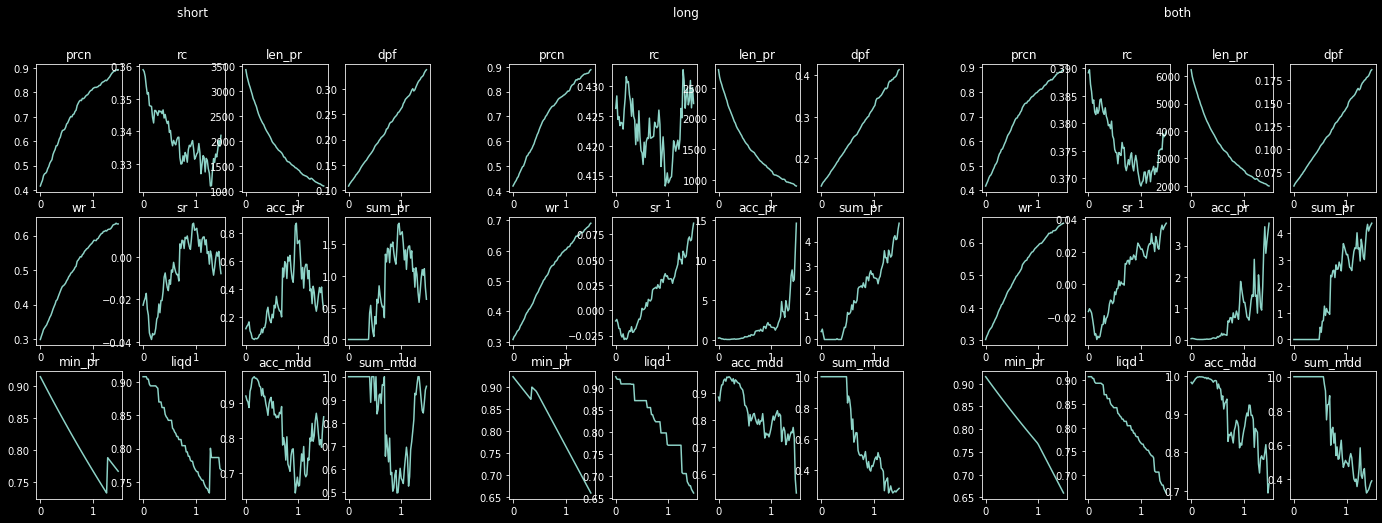

In [ ]:
# from google.colab import output
# ------------ survey param ------------ #
itv_num_list = [1, 3, 5, 15]
itv_list = ['15m', '30m', '1h', '4h']
# itv_list = ['3m', '5m', '15m', '30m', '1h', '4h']
# val_list = np.arange(, 2.0, 0.1)     # prcn 1
val_list = np.arange(0.0, 1.5, 0.02)  # prcn 2
# val_list = np.arange(-0.695, -0.75, -0.005)    # prcn 3
# val_list = np.arange(0.944, 0.945, 0.0001)    # prcn 4
# val_list = np.arange(70, 80, 1)   # prcn -1
# val_list = np.arange(200, 180, -5)   # prcn -2

# ------------ get survey_res ------------ #
result = []
config_list_copy = copy.deepcopy(config_list)
for set_val in val_list:
  # ------------ open 결정 이전의 인자값 ------------ #
  # ------ point * mr_res ------ #
  # # config_list_copy[0].loc_set.zone.degree_list = set_val
  # config_list_copy[0].loc_set.point2.wick_score_list = str([set_val])
  # open_info_df = get_open_info_df(ep_loc_v2, res_df, np_timeidx, ID_list, config_list_copy, id_idx_list)

  # ------------ open 결정 이후의 인자값 ------------ #
  # ------ utils ------ #
  # Todo - 추후, rtc & tr survey 사용하는 경우 utils_ rerun 해주어할 것 -> 이곳에서 진행 (res_df 만 편집하면 되니까)
  config_list_copy[0].tr_set.out_gap = set_val  
  for utils_, config_ in zip(utils_list, config_list_copy):
    # enlist_rtc(res_df, config_, np_timeidx)
    enlist_tr(res_df, config_, np_timeidx)

  # ------ entry, exit (ep, tp, out vars.) ------ #
  # config_list_copy[0].ep_set.ep_out_tick = set_val  
  try:
    result.append(get_res(res_df, open_info_df, ohlc_list, point2_list, market_data_list, config_list_copy, np_timeidx, funcs, test_ratio=0.3, plot_is=1, signi=True))
  except:
    pass
survey_res_list = [np.array(result)[:, s_i::3] for s_i in range(3)]   # 3 for s, l, b
# short_res, long_res, both_res = survey_res_list

# ------------ plot survey_res ------------ #
title_list = ["short", "long", "both"]
sub_title_list = ['prcn', 'rc', 'len_pr', 'dpf', 'wr', 'sr', 'acc_pr', 'sum_pr', 'min_pr', 'liqd', 'acc_mdd', 'sum_mdd']
space_ = " " * 120

fig = plt.figure(figsize=(24, 8))
plt.style.use('dark_background')
gs = gridspec.GridSpec(nrows=1,
                        ncols=3,
                        # height_ratios=[1, 1, 1]
                      )
# nrows, ncols, h_r = 3, 3, [1, 1, 1]
nrows, ncols, h_r = 3, 4, [1, 1, 1]
# nrows, ncols, h_r = 4, 3, [1, 1, 1, 1]
# if d_idx == 0:
# else:
  # nrows, ncols, h_r = 2, 2, [1, 1]

for d_idx, (title_name, survey_res) in enumerate(zip(title_list, survey_res_list)):  
  inner_gs = gs[d_idx].subgridspec(nrows=nrows,
                        ncols=ncols,
                        height_ratios=h_r
                      )
  for in_idx, (data_, sub_title) in enumerate(zip(survey_res.T, sub_title_list)):
    plt.subplot(inner_gs[in_idx])
    plt.plot(val_list[:len(result)], data_.ravel())  # 앞에서부터 len(result) 만큼만
    plt.title(sub_title)

plt.suptitle(space_.join(title_list))
plt.show()
# print("\n")

### legacy

#### main_functions

In [ ]:
def get_open_info_df(ep_loc_v2, res_df, np_timeidx, ID_list, config_list, id_idx_list):
  start_0 = time.time()
  # ------ get mr_res, zone_arr ------ #
  short_mr_res_obj = np.array([ep_loc_v2(res_df, config_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL) for config_ in config_list])
  long_mr_res_obj = np.array([ep_loc_v2(res_df, config_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.BUY) for config_ in config_list])
  short_open_idx_list = [np.where(res_df['short_open_{}'.format(id)].to_numpy() * mr_res)[0] for id, mr_res in zip(ID_list, short_mr_res_obj[:, 0].astype(np.float64))]   # "point * mr_Res"
  long_open_idx_list = [np.where(res_df['long_open_{}'.format(id)].to_numpy() * mr_res)[0] for id, mr_res in zip(ID_list, long_mr_res_obj[:, 0].astype(np.float64))]  # zip 으로 zone (str) 과 묶어서 dtype 변경됨

  # ------ open_info_arr ------ #
  short_side_list = [np.full(len(list_), OrderSide.SELL) for list_ in short_open_idx_list]
  long_side_list = [np.full(len(list_), OrderSide.BUY) for list_ in long_open_idx_list]

  short_zone_list = [zone_res[short_open_idx] for zone_res, short_open_idx in zip(short_mr_res_obj[:, 1], short_open_idx_list)]
  long_zone_list = [zone_res[long_open_idx] for zone_res, long_open_idx in zip(long_mr_res_obj[:, 1], long_open_idx_list)]

  short_id_list = [np.full(len(list_), id) for id, list_ in zip(ID_list, short_open_idx_list)]
  long_id_list = [np.full(len(list_), id) for id, list_ in zip(ID_list, long_open_idx_list)]

  selected_id_idx = np.arange(len(id_idx_list))
  short_id_idx_list = [np.full(len(list_), id) for id, list_ in zip(selected_id_idx, short_open_idx_list)]
  long_id_idx_list = [np.full(len(list_), id) for id, list_ in zip(selected_id_idx, long_open_idx_list)]

  # ------ get open_info_df ------ #
  #   series 만들어서 short / long 끼리 합치고 둘이 합치고, 중복은 우선 순위 정해서 제거
  short_open_df_list = [pd.DataFrame(index=index_, data=np.vstack((data_)).T, columns=['side', 'zone', 'id', 'id_idx']) for index_, data_ in zip(short_open_idx_list, zip(short_side_list, short_zone_list, short_id_list, short_id_idx_list))]
  long_open_df_list = [pd.DataFrame(index=index_, data=np.vstack((data_)).T, columns=['side', 'zone', 'id', 'id_idx']) for index_, data_ in zip(long_open_idx_list, zip(long_side_list, long_zone_list, long_id_list, long_id_idx_list))]

  open_info_df = pd.concat(short_open_df_list + long_open_df_list)
  # ------ sorting + unique ------ #
  open_info_df.sort_index(inplace=True)
  # print(len(open_info_df))
  # print(len(open_info_df))
  # open_info_df.head()
  print("get_open_info_df elapsed time :", time.time() - start_0)
  return open_info_df[~open_info_df.index.duplicated(keep='first')]  # 먼저 순서를 우선으로 지정  

In [ ]:
def get_res(res_df, open_info_df, ohlc_list, point2_list, market_data_list, config_list, np_timeidx, funcs, test_ratio=0.3, plot_is=True, signi=False):
  # ------------ make open_info_list ------------ #
  open_idx = open_info_df.index.to_numpy()
  len_df = len(res_df)
  s_idx = (open_idx < int(len_df * (1 - test_ratio))) == plot_is
  s_open_info_df = open_info_df[s_idx]
  s_open_idx = open_idx[s_idx]

  open_info_list = [s_open_info_df[col_].to_numpy() for col_ in s_open_info_df.columns]
  side_arr, zone_arr, id_arr, id_idx_arr = open_info_list

  # ------------ get paired_res ------------ #
  start_0 = time.time()
  paired_res = en_ex_pairing(res_df, s_open_idx, open_info_list, ohlc_list, point2_list, market_data_list, config_list, np_timeidx, funcs)
  # valid_openi_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr = paired_res
  print("en_ex_pairing elapsed time :", time.time() - start_0)  #  0.37 --> 0.3660471439361572 --> 0.21(lesser if)

  # ------------ idep_plot ------------ #
  start_0 = time.time()
  h, l = ohlc_list[1:3]
  res = idep_plot_v6(len_df, h, l, s_open_idx, side_arr, paired_res, inversion=False, sample_ratio=1 - test_ratio, signi=signi)
  print("idep_plot_v6 elapsed time :", time.time() - start_0)   # 1.40452 (v6) 1.4311 (v5)

  return res

In [ ]:
def idep_plot_v6(len_df, h, l, open_idx, side_arr, paired_res, inversion=False, sample_ratio=0.7, title_position=(0.5, 0.5), fontsize=15, signi=False):
    if not signi:
        plt.style.use(['dark_background', 'fast'])
        fig = plt.figure(figsize=(24, 8))
        gs = gridspec.GridSpec(nrows=2,  # row 몇 개
                               ncols=3,  # col 몇 개
                               height_ratios=[10, 1]
                               # height_ratios=[10, 10, 1]
                               )
    gs_idx = 0
    # plt.suptitle(key)

    if sample_ratio is not None:
      sample_len = int(len_df * sample_ratio)
    else:
      sample_len = len_df

    # ------ short & long data preparation ------ #
    # start_0 = time.time()
    valid_openi_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr, bias_arr = paired_res    
    assert len(valid_openi_arr) != 0, "assert len(valid_openi_arr) != 0"    
    short_valid_openi_idx = np.where(side_arr[valid_openi_arr] == OrderSide.SELL)[0]  # valid_openi_arr 에 대한 idx, # side_arr,
    long_valid_openi_idx = np.where(side_arr[valid_openi_arr] == OrderSide.BUY)[0]

    valid_open_idx = open_idx[valid_openi_arr].reshape(-1, 1)

    short_obj = np.hstack((pair_price_arr, pair_idx_arr, valid_open_idx))[short_valid_openi_idx]
    long_obj = np.hstack((pair_price_arr, pair_idx_arr, valid_open_idx))[long_valid_openi_idx]
    both_obj = np.vstack((short_obj, long_obj))
    print("short_obj.shape :", short_obj.shape)
    print("long_obj.shape :", long_obj.shape)

    short_obj, long_obj, both_obj = [np.split(obj_, 5, axis=1) for obj_ in [short_obj, long_obj, both_obj]]

    short_lvrg_arr, long_lvrg_arr = [lvrg_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    short_fee_arr, long_fee_arr = [fee_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    short_tpout_arr, long_tpout_arr = [tpout_arr[openi_idx_] for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    short_bias_arr, long_bias_arr = [bias_arr[openi_idx_] for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    # print("elapsed time :", time.time() - start_0)

    short_true_bias_idx = short_bias_arr[:, 0] <= short_bias_arr[:, 1] # info, threshold (등호의 유무가 매우 유의미함)
    long_true_bias_idx = long_bias_arr[:, 0] >= long_bias_arr[:, 1]

    # ------ plot_data ------ #
    try:
      # start_0 = time.time()
      short_pr = get_pr(OrderSide.SELL, *short_obj[:2], short_lvrg_arr, short_fee_arr, inversion)
      short_total_pr = to_total_pr(len_df, short_pr, short_obj[-2])
      short_cum_pr = np.cumprod(short_total_pr)
      short_liqd = liquidation(OrderSide.SELL, h, short_obj[:4], short_lvrg_arr, short_fee_arr)
      short_prcn, short_rc = precision(short_pr, short_true_bias_idx), recall(short_true_bias_idx)
      if signi:
        short_idep_res_obj = (short_prcn, short_rc) + get_res_info_nb_v2(sample_len, short_pr, short_total_pr, short_cum_pr, short_liqd)
      else:
        gs_idx = plot_info_v4(gs, gs_idx, sample_len, short_pr, short_total_pr, short_cum_pr, short_liqd, short_prcn, short_rc, short_lvrg_arr[-1], title_position, fontsize)
      # print("elapsed time :", time.time() - start_0)
    except Exception as e:
      gs_idx += 1
      print(e)

    try:
      # start_0 = time.time()
      long_pr = get_pr(OrderSide.BUY, *long_obj[:2], long_lvrg_arr, long_fee_arr, inversion)
      long_total_pr = to_total_pr(len_df, long_pr, long_obj[-2])
      long_cum_pr = np.cumprod(long_total_pr)
      long_liqd = liquidation(OrderSide.BUY, l, long_obj[:4], long_lvrg_arr, long_fee_arr)
      long_prcn, long_rc = precision(long_pr, long_true_bias_idx), recall(long_true_bias_idx)
      if signi:
        long_idep_res_obj = (long_prcn, long_rc) + get_res_info_nb_v2(sample_len, long_pr, long_total_pr, long_cum_pr, long_liqd)
      else:
        gs_idx = plot_info_v4(gs, gs_idx, sample_len, long_pr, long_total_pr, long_cum_pr, long_liqd, long_prcn, long_rc, long_lvrg_arr[-1], title_position, fontsize)
      # print("elapsed time :", time.time() - start_0)
    except Exception as e:
      gs_idx += 1
      print(e)

    try:
      # start_0 = time.time()
      both_pr = np.vstack((short_pr, long_pr))  # for 2d shape, obj 를 1d 로 만들지 않는 이상, pr 은 2d 유지될 것
      both_total_pr = to_total_pr(len_df, both_pr, both_obj[-2])
      both_cum_pr = np.cumprod(both_total_pr)
      both_liqd = min(short_liqd, long_liqd)
      both_true_bias_idx = np.hstack((short_true_bias_idx, long_true_bias_idx))  # for 1d shape
      both_prcn, both_rc = precision(both_pr, both_true_bias_idx), recall(both_true_bias_idx)
      if signi:
        both_idep_res_obj = (both_prcn, both_rc) + get_res_info_nb_v2(sample_len, both_pr, both_total_pr, both_cum_pr, both_liqd)
      else:
        gs_idx = plot_info_v4(gs, gs_idx, sample_len, both_pr, both_total_pr, both_cum_pr, both_liqd, both_prcn, both_rc, lvrg_arr[-1], title_position, fontsize)
      # print("elapsed time :", time.time() - start_0)
    except Exception as e:
      gs_idx += 1
      print(e)

    if not signi:
        for obj, cum_pr in zip([short_obj, long_obj, both_obj], [short_cum_pr, long_cum_pr, both_cum_pr]):
          try:
            # start_0 = time.time()
            gs_idx = frq_dev_plot_v3(gs, gs_idx, len_df, sample_len, obj[-2], cum_pr[-1], fontsize)
            # print("elapsed time :", time.time() - start_0)          
          except Exception as e:
            gs_idx += 1
            print(e)

        plt.show()
        plt.close()
        return short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_bias_arr, \
                long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_bias_arr
    else:
        return [short_idep_res_obj[:-1], long_idep_res_obj[:-1], both_idep_res_obj[:-1]]

#### get paired_res function

In [ ]:
def en_ex_pairing(res_df, open_idx, open_info_list, ohlc_list, point2_list, market_data_list, config_list, np_timeidx, funcs):  # 이미 충분히 줄여놓은 idx 임
    side_arr, zone_arr, id_arr, id_idx_arr = open_info_list
    id_idx_arr = id_idx_arr.astype(int)

    ep_out, ep_loc_point2, lvrg_set = funcs

    valid_openi_list, pair_idx_list, pair_price_list, lvrg_list, fee_list, tpout_list, bias_list = [[] for li in range(7)]
    len_df = len(res_df)
    len_open_idx = len(open_idx)
    i, open_i = 0, -1  # i for total_res_df indexing

    while 1:
        # ------------ entry phase ------------ #
        open_i += 1  # 확인 끝났으면 조기 이탈(+1), 다음 open_idx 조사 진행
        if open_i >= len_open_idx:
          break
          
        # ------ ep_loc ------ #
        op_idx = open_idx[open_i]  # open_i 는 i 와 별개로 운영
        if op_idx < i:  # i = 이전 거래 끝난후의 res_df index - "거래 종료후 거래 시작", '<' : 거래 종료시점 진입 가능하다는 의미
            continue

        # ------ dynamic data by ID ------ #
        #     1. 해당 id 로 config 재할당해야함
        id_idx = id_idx_arr[open_i]
        config = config_list[id_idx]
        strat_version = config.strat_version
        open_side = side_arr[open_i]

        side_pos = 'short' if open_side == OrderSide.SELL else 'long'
        ep_arr = res_df['{}_ep_{}'.format(side_pos, strat_version)].to_numpy()  # Todo - while loop 내에서 to_numpy() 반복하느니, pd_indexing 이 낫지 않을까
        tp_arr = res_df['{}_tp_{}'.format(side_pos, strat_version)].to_numpy()  # => eptpout arr_list 만들어서 꺼내 사용하면 될 것
        out_arr = res_df['{}_out_{}'.format(side_pos, strat_version)].to_numpy()
        bias_info_arr = res_df['{}_bias_info_{}'.format(side_pos, strat_version)].to_numpy()  # ex. rolling(entry ~ end)'s high
        bias_thresh_arr = res_df['{}_bias_thresh_{}'.format(side_pos, strat_version)].to_numpy()  # ex. close + dc_T20 * 0.5

        # ------ ei_k & point2 ------ #
        i = op_idx + 1  # open_signal 이 close_bar.shift(1) 이라고 가정하고 다음 bar 부터 체결확인한다는 의미
        if i >= len_df:  # res_df 의 last_index 까지 돌아야함
            break
        exec_j, ep_j, tp_j, out_j, entry_done, en_p, fee = check_eik_point2_exec(res_df, config, op_idx, len_df, open_side, [*ohlc_list, ep_arr], point2_list, ep_out, ep_loc_point2)
        i = exec_j
        
        if not entry_done:
            continue

        # ------ leverage ------ #
        out = out_arr[out_j]  # lvrg_set use out on out_j
        leverage = lvrg_set(res_df, config, open_side, en_p, out, fee)  # res_df 변수 사용됨 - 주석 처리 된 상태일뿐
        if leverage is None:
            continue

        exit_done, cross_on = 0, 0
        # ------ check tpout_onexec ------ #
        # if not config.ep_set.static_ep and config.ep_set.entry_type == "LIMIT" and config.ep_set.tpout_onexec:
        if config.ep_set.entry_type == "LIMIT":
            if config.tp_set.tp_onexec:  # dynamic 은 tp_onexec 사용하는 의미가 없음
                tp_j = exec_j
            if config.out_set.out_onexec:  # dynamic 은 out_onexec 사용하는 의미가 없음
                out_j = exec_j
        while 1:
            # ------------ exit phase ------------ #
            i += 1  # entry 다음 tick 부터 exit 허용
            if i >= len_df:  # res_df 의 last_index 까지 돌아야함
                break

            if not config.tp_set.static_tp:
                tp_j = i
            if not config.out_set.static_out:
                out_j = i

            # ------------ tp ------------ #
            if not config.tp_set.non_tp:
                exit_done, ex_p, fee = check_limit_tp_exec(res_df, config, open_i, i, tp_j, len_df, fee, open_side, exit_done, [*ohlc_list, [tp_arr]])  # 여기서는 j -> i 로 변경해야함
                # if config.tp_set.tp_type in ['LIMIT']:  # 'BOTH' -> 앞으로는, LIMIT 밖에 없을거라 주석처리함
                # if not exit_done and config.tp_set.tp_type in ['MARKET', 'BOTH']:

            # ------------ out ------------ #
            # ------ signal_out ------ #
            if not exit_done:
              exit_done, cross_on, ex_p, fee = check_market_out_exec(config, open_i, i, len_df, fee, open_side, cross_on, exit_done, [np_timeidx, *market_data_list])
            # ------ hl_out ------ #
            if config.out_set.hl_out != "None":
              if not exit_done:  # and i != len_df - 1:                
                  exit_done, ex_p, fee = check_out(config, open_i, i, out_j, len_df, fee, open_side, exit_done, [*ohlc_list, out_arr])

            if exit_done:  # 이 phase 는 exit_phase 뒤에도 있어야할 것 - entry_done var. 사용은 안하겠지만
                # ------ append dynamic vars. ------ #
                valid_openi_list.append(open_i)  # side, zone, start_ver arr 모두 openi_list 로 접근하기 위해 open_i 를 담음
                pair_idx_list.append([exec_j, i])  # entry & exit (체결 기준임)
                pair_price_list.append([en_p, ex_p])
                lvrg_list.append(leverage)
                fee_list.append(fee)
                tpout_list.append([tp_arr[tp_j], out_arr[out_j]])  # for tpout_line plot_check
                # bias_list.append([bias_info_arr[exec_j], bias_thresh_arr[exec_j]])  # backtest 에서만 가능한 future_data 사용
                bias_list.append([bias_info_arr[exec_j], tp_arr[tp_j]])  # tp = bias_thresh 

                # open_i += 1  # 다음 open_idx 조사 진행
                break

        if i >= len_df: # or open_i >= len_open_idx:  # res_df 의 last_index 까지 돌아야함
            break
        else:
            continue

    return np.array(valid_openi_list), np.array(pair_idx_list), np.array(pair_price_list), np.array(lvrg_list), np.array(fee_list), np.array(tpout_list), np.array(bias_list)


def check_eik_point2_exec(res_df, config, op_idx, len_df, open_side, np_datas, point2_list, ep_out, ep_loc_point2):
    o, h, l, c, ep_arr = np_datas
    ep_j = op_idx
    tp_j = op_idx
    out_j = op_idx

    strat_version = config.strat_version    
    allow_ep_in = 0 if config.ep_set.point2.use_point2 else 1
    entry_done = 0
    ep = None

    if config.ep_set.entry_type == "LIMIT":
        fee = config.trader_set.limit_fee

        for e_j in range(op_idx + 1, len_df):
            # ------ index setting for dynamic options ------ #
            if not config.ep_set.static_ep:
                ep_j = e_j  # dynamic_ep 를 위한 ep_index var.
                out_j = e_j  # dynamic_out 를 위한 out_index var. - 조건식이 static_ep 와 같이 있는 이유 모름 => dynamic_lvrg 로 사료됨

            if not config.tp_set.static_tp:
                tp_j = e_j

            # ------ ei_k ------ # - limit 사용하면 default 로 ei_k 가 존재해야함
            if ep_out(res_df, config, op_idx, e_j, tp_j, [h, l], open_side):
              break

            # ------ point2 ------ #
            if not allow_ep_in:
                allow_ep_in, out_j = ep_loc_point2(res_df, config, e_j, out_j, point2_list, side=open_side)
                if allow_ep_in:
                  if config.ep_set.point2.entry_type == "LIMIT":
                    ep_j = e_j
                    # print("e_j in point2 :", e_j)
                    continue

            # ------ check ep_exec ------ #
            if allow_ep_in:
              if config.ep_set.point2.use_point2 and config.ep_set.point2.entry_type == 'MARKET':
                entry_done = 1
                ep = c[e_j]
                break
              else:
                if open_side == OrderSide.SELL:
                    if h[e_j] >= ep_arr[ep_j]:
                        entry_done = 1
                        ep = ep_arr[ep_j]
                        if o[e_j] >= ep_arr[ep_j]:  # open comp 는 결국, 수익률에 얹어주는 logic (반보수) -> 사용 보류
                            ep = o[e_j]
                        break
                else:
                    if l[e_j] <= ep_arr[ep_j]:
                        entry_done = 1
                        ep = ep_arr[ep_j]
                        if o[e_j] <= ep_arr[ep_j]:
                            ep = o[e_j]
                        break

    else:  # market entry
        e_j = op_idx + 1
        entry_done = 1
        ep = c[op_idx]
        fee = config.trader_set.market_fee

    return e_j, ep_j, tp_j, out_j, entry_done, ep, fee  # 다음 start_i <-- e_j 로 변경
    #   e_j => 다음 phase 의 시작 index <-> ep_j : ep 의 기준 index
    #   ep_j, tp_j, out_j 가 return 되어야함 - exit phase 에서 이어가기 위함


def check_limit_tp_exec(res_df, config, open_i, j, tp_j, len_df, fee, open_side, exit_done, np_datas):
    o, h, l, c, tps = np_datas
    tp = None
    strat_version = config.strat_version
    len_tps = len(tps)

    for tp_i, tp_arr in enumerate(tps):
        #     decay adjustment    #
        #     tp_j includes dynamic_j - functionalize  #
        try:
            if config.tr_set.decay_gap != "None":
                decay_share = (j - open_i) // config.tp_set.decay_term
                decay_remain = (j - open_i) % config.tp_set.decay_term
                if j != open_i and decay_remain == 0:
                    if open_side == OrderSide.SELL:
                        tp_arr[tp_j] += res_df['short_rtc_gap_{}'.format(strat_version)].iloc[open_i] * config.tr_set.decay_gap * decay_share
                    else:
                        tp_arr[tp_j] -= res_df['long_rtc_gap_{}'.format(strat_version)].iloc[open_i] * config.tr_set.decay_gap * decay_share
        except:
            pass

        if open_side == OrderSide.SELL:
            if l[j] <= tp_arr[tp_j]:  # and partial_tp_cnt == tp_i:  # we use static tp now
                # if l[j] <= tp_arr[j] <= h[j]: --> 이건 잘못되었음
                # partial_tp_cnt += 1 --> partial_tp 보류

                # ------ dynamic tp ------ #
                if tp_arr[j] != tp_arr[j - 1] and not config.tp_set.static_tp:
                    # tp limit 이 불가한 경우 - open 이 이미, tp 를 넘은 경우
                    if o[j] < tp_arr[j]:
                        tp = o[j]
                    # tp limit 이 가능한 경우 - open 이 아직, tp 를 넘지 않은 경우
                    else:
                        tp = tp_arr[j]
                # ------ static tp ------ #
                else:
                    #   tp limit 이 불가한 경우 - open 이 이미, tp 를 넘은 경우
                    if o[j] < tp_arr[tp_j]:  # static 해놓고 decay 사용하면 dynamic 이니까
                        if config.tr_set.decay_gap != "None" and decay_remain == 0:
                            tp = o[j]  # tp_j -> open_i 를 가리키기 때문에 decay 는 한번만 진행되는게 맞음
                        else:
                            tp = tp_arr[tp_j]
                    else:
                        tp = tp_arr[tp_j]

                if tp_i == len_tps - 1:
                    exit_done = 1  # partial 을 고려해 exit_done = 1 상태는 tp_i 가 last_index 로 체결된 경우만 해당

        else:
            if h[j] >= tp_arr[tp_j]:
                # ------ dynamic tp ------ #
                if tp_arr[j] != tp_arr[j - 1] and not config.tp_set.static_tp:
                    if o[j] > tp_arr[j]:
                        tp = o[j]
                    else:
                        tp = tp_arr[j]

                # ------ static tp ------ #
                else:
                    if o[j] > tp_arr[tp_j]:
                        if config.tr_set.decay_gap != "None" and decay_remain == 0:
                            tp = o[j]
                        else:
                            tp = tp_arr[tp_j]
                    else:
                        tp = tp_arr[tp_j]

                if tp_i == len_tps - 1:
                    exit_done = 1  # partial 을 고려해 exit_done = 1 상태는 tp_i 가 last_index 로 체결된 경우만 해당

    if exit_done:
        fee += config.trader_set.limit_fee

    return exit_done, tp, fee


def check_market_out_exec(config, open_i, j, len_df, fee, open_side, cross_on, exit_done, np_datas):
    np_timeidx, c, bb_lower_5T, bb_upper_5T, rsi_exit, ha_o, ha_h, ha_l, ha_c = np_datas
    tp = None
    strat_version = config.strat_version

    # ------ timestamp ------ #
    if config.out_set.tf_exit != "None":
        if np_timeidx[j] % config.out_set.tf_exit == config.out_set.tf_exit - 1 and j != open_i:
            exit_done = 1

    # ------ rsi ------ # -> vectorize 가능함 => 추후 적용
    if config.out_set.rsi_exit:
        if open_side == OrderSide.SELL:
            if (rsi_exit[j - 1] >= 50 - config.loc_set.point.osc_band) & (rsi_exit[j] < 50 - config.loc_set.point.osc_band):
                exit_done = 1
        else:
            if (rsi_exit[j - 1] <= 50 + config.loc_set.point.osc_band) & (rsi_exit[j] > 50 + config.loc_set.point.osc_band):
                exit_done = 1

    # ------ heikin_ashi ------ #
    # if strat_version in ['v3_3']:
    #     if open_side == OrderSide.SELL:
    #       if (ha_o[j] < ha_c[j]):# & (ha_o[j] == ha_l[j]):   # 양봉 출현
    #           exit_done = 1
    #     else:
    #       if (ha_o[j] > ha_c[j]):# & (ha_o[j] == ha_h[j]):  # 음봉 출현
    #           exit_done = 1

    # ------------ early out ------------ #
    # ------ bb ------ # --> cross_on 기능은 ide latency 개선 여부에 해당되지 않음
    if strat_version in ['v5_2']:
        if open_side == OrderSide.SELL:
            if c[j] < bb_lower_5T[j] < c[j - 1]:
                cross_on = 1
            if cross_on == 1 and c[j] > bb_upper_5T[j] > c[j - 1]:
                exit_done = 1
        else:
            if c[j] > bb_upper_5T[j] > c[j - 1]:
                cross_on = 1
            if cross_on == 1 and c[j] < bb_lower_5T[j] < c[j - 1]:
                exit_done = 1

    if exit_done:
        tp = c[j]
        fee += config.trader_set.market_fee

    return exit_done, cross_on, tp, fee


def check_out(config, open_i, j, out_j, len_df, fee, open_side, exit_done, np_datas):
    o, h, l, c, out_arr = np_datas
    tp = None

    if config.out_set.hl_out:
        if open_side == OrderSide.SELL:
            if h[j] >= out_arr[out_j]:  # check out only once
                exit_done = 1
        else:
            if l[j] <= out_arr[out_j]:  # check out only once
                exit_done = 1
    else:  # close_out
        if open_side == OrderSide.SELL:
            if c[j] >= out_arr[out_j]:  # check out only once
                exit_done = 1
        else:
            if c[j] <= out_arr[out_j]:  # check out only once
                tp = c[j]
                exit_done = 1

    if exit_done:
        if config.out_set.hl_out:
            tp = out_arr[out_j]
        else:
            tp = c[j]

        if open_side == OrderSide.SELL:
            if o[j] >= out_arr[out_j]:
                tp = o[j]
        else:
            if o[j] <= out_arr[out_j]:
                tp = o[j]

        fee += config.trader_set.market_fee

    return exit_done, tp, fee

#### ep_loc.point & zone legacy

In [ ]:


    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] >= res_df['cloud_bline_%s' % cb_itv]) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['cloud_bline_%s' % cb_itv]) &
    #                 (res_df['close'] < res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(strat_version)] - 1, res_df['entry_{}'.format(strat_version)])

    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] >= res_df['bb_lower_1m']) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['bb_lower_1m']) &
    #                 (res_df['close'] < res_df['bb_lower_1m'])
    #                 , res_df['entry_{}'.format(strat_version)] - 1, res_df['entry_{}'.format(strat_version)])

    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] <= res_df['cloud_bline_%s' % cb_itv]) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['cloud_bline_%s' % cb_itv]) &
    #                   (res_df['close'] > res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(strat_version)] + 1, res_df['entry_{}'.format(strat_version)])

    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] <= res_df['bb_upper_1m']) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['bb_upper_1m']) &
    #                   (res_df['close'] > res_df['bb_upper_1m'])
    #                 , res_df['entry_{}'.format(strat_version)] + 1, res_df['entry_{}'.format(strat_version)])


    
   # --------------- ema --------------- #   
  # res_df['ema5_1m'] = ema(res_df['close'], 5).shift(1)

  #   # --------------- cloud bline --------------- #   
  # res_df['cloud_bline_1m'] = cloud_bline(res_df, 26).shift(1)
  
    #       stochastic      #
  # res_df['stoch'] = stoch(res_df, 5, 3, 3)

    #       fisher      #
  # res_df['fisher30'] = fisher(res_df, 30)
  # res_df['fisher60'] = fisher(res_df, 60)
  # res_df['fisher120'] = fisher(res_df, 120)

    #       cctbbo      #
  # res_df['cctbbo'], _ = cct_bbo(res_df, 21, 13)

    #       ema_roc      #
  # res_df['ema_roc'] = ema_roc(res_df['close'], 13, 9)


   # ------------------------------ htf data ------------------------------ #    

  #             Todo              #
  # htf_df = pd.read_excel(date_path2 + key.replace("_st1h_backi2", ""), index_col=0)
  # htf_df = pd.read_excel(date_path3 + key.replace("_st1h_backi2", ""), index_col=0)
  # # htf_df = pd.read_excel(date_path4 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # htf_df = pd.read_excel(date_path5 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # # # # htf_df = pd.read_excel(date_path6 + key.replace("_st1h_backi2", ""), index_col=0)

  # # ---- htf index slicing ---- #
  # htf_df = htf_df.loc[:res_df.index[-1]]
  
  # print("res_df.index[-1] :", res_df.index[-1])
  # print("htf_df.index[-1] :", htf_df.index[-1])

  # res_df = dc_line(res_df, htf_df, '5m')
  # res_df = dc_level(res_df, '5m', 1)


  # # # if "sma4" in res_df.columns:
  # # #   res_df.drop("sma4", axis=1, inplace=1)

  # # htf_df['sma'] = htf_df['close'].rolling(60).mean()
  # # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1]), columns=['sma_30m']))
  
  # htf_df['stoch'] = stoch(htf_df, 13, 3, 3)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1], backing_i=-1), columns=['stoch_5m']))

   
  # fifth_df['ema'] = ema(fifth_df['close'], 5)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, fifth_df, [-1]), columns=['ema5']))

        # ------------------------------------ short ------------------------------------ # 

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 0:
        #   mr_score += 1

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 0:
        #   mr_score += 1          

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 0:
        #   mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_upper_1m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_upper_3m'].iloc[i] <= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_upper_5m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == 'MARKET':
        #   mr_const_cnt += 1
        #   if (res_df['close'].iloc[i] - res_df['short_tp'].iloc[i]) / (res_df['short_out'].iloc[i] - res_df['close'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error):  
        #     mr_score += 1

           
        # ------- entry once ------- #   
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == 1:
        #     break

        #   elif res_df['entry'][back_i] == -1:
        #     prev_entry_cnt += 1          
        # # # print("prev_entry_cnt :", prev_entry_cnt)

        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1

        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
        #   #       bb zone     #
        # if res_df['close'].iloc[i] < res_df['bb_lower_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_lower2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_base_1h'].iloc[i]:

        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] < res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1

  
        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['low'].iloc[i] > res_df['short_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1



        # ------------------------------------ long ------------------------------------ # 
          

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 1:
        #   mr_score += 1   

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 1:
        #   mr_score += 1     

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 1:
          # mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_lower_1m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_lower_3m'].iloc[i] >= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_lower_5m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == "MARKET":
          # mr_const_cnt += 1        
          # if (res_df['long_tp'].iloc[i] - res_df['close'].iloc[i]) / (res_df['close'].iloc[i] - res_df['long_out'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error): # 일반적으로 dr 상에서 tp 비율이 더 커짐 (tr 보다)
          #   mr_score += 1

        # -------------- ep limit -------------- #    
        # mr_const_cnt += 1
        # # if (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # if config.ep_set.min_eplim_pct < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # # if 0 < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        #   # if res_df['st_gap_15m'].iloc[i] / res_df['open'].iloc[i] < 0:
        #   #   print("i, res_df['st_gap_15m'].iloc[i] :", i, res_df['st_gap_15m'].iloc[i])
        #   mr_score += 1


        # -------------- entry once -------------- #    
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == -1:
        #     break

        #   elif res_df['entry'][back_i] == 1:
        #     prev_entry_cnt += 1
          
        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1


        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
          
        #   #       bb zone     #
        # if res_df['close'].iloc[i] > res_df['bb_upper_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_upper2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_base_1h'].iloc[i]:
        
        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] > res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1


        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['high'].iloc[i] < res_df['long_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
          
        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1

#### dump

In [ ]:
short_open_res = np.ones(len(res_df))

strat_version = config.strat_version

short_rtc_1_col, short_rtc_0_col, short_rtc_gap_col = 'short_rtc_1_{}'.format(strat_version), 'short_rtc_0_{}'.format(strat_version), 'short_rtc_gap_{}'.format(strat_version) 
long_rtc_1_col, long_rtc_0_col, long_rtc_gap_col = 'long_rtc_1_{}'.format(strat_version), 'long_rtc_0_{}'.format(strat_version), 'long_rtc_gap_{}'.format(strat_version) 

short_rtc_1_col, short_rtc_0_col, short_rtc_gap_col = 'short_rtc_1_{}'.format(strat_version), 'short_rtc_0_{}'.format(strat_version), 'short_rtc_gap_{}'.format(strat_version) 
long_rtc_1_col, long_rtc_0_col, long_rtc_gap_col = 'long_rtc_1_{}'.format(strat_version), 'long_rtc_0_{}'.format(strat_version), 'long_rtc_gap_{}'.format(strat_version) 

data_cols = ['open', 'high', 'low']   # Todo - public_indi 이전에 해야할지도 모름 # 'close', 'haopen', 'hahigh', 'halow', 'haclose'
rtc_cols = [short_rtc_1_col, short_rtc_0_col, short_rtc_gap_col, long_rtc_1_col, long_rtc_0_col, long_rtc_gap_col]   # Todo - public_indi 이전에 해야할지도 모름

short_rtc_1_, short_rtc_0_, short_rtc_gap_, long_rtc_1_, long_rtc_0_, long_rtc_gap_ = [res_df[col_].to_numpy() for col_ in rtc_cols]
open, high, low = [res_df[col_].to_numpy() for col_ in data_cols]
short_base = (short_rtc_1_ + short_rtc_0_) / 2
long_base = (long_rtc_1_ + long_rtc_0_) / 2
# back_ha_o = res_df['haopen'].shift(1).to_numpy()
# back_ha_c = res_df['haclose'].shift(1).to_numpy()

touch_period = 50
# short_open_res *= (back_ha_c >= back_ha_o) & (ha_o > ha_c)
# short_open_res *= ha_o == ha_h
# short_open_res *= np_timeidx % tf_entry == tf_entry - 1     
short_a_touch = pd.Series(np.where(high >= short_rtc_0_, np.arange(len(res_df)), np.nan)).rolling(touch_period, min_periods=1).max().to_numpy()  # min -> max
short_b_touch = pd.Series(np.where(low <= short_rtc_1_, np.arange(len(res_df)), np.nan)).rolling(touch_period, min_periods=1).max().to_numpy()   # min 으로 하면 a 이전에 b 있는건 모두 제외하게됨

short_en_p = (get_line(short_a_touch, short_rtc_0_) + get_line(short_b_touch, short_rtc_1_)) / 2
short_base_b = get_line(short_b_touch, short_base)
short_rtc_gap_b = get_line(short_b_touch, short_rtc_gap_)
short_open_res *= (high >= short_base_b) & (short_base_b >= open) & (short_a_touch < short_b_touch) & (short_base_b + config.loc_set.point.base_gap * short_rtc_gap_b >= short_base)

res_df['short_open_{}'.format(strat_version)] = short_open_res

In [ ]:
# print(short_b_touch[-100:])
# print(short_base_b[-100:])
true_idx = short_open_res == 1
short_a_touch_line = get_line(short_a_touch, short_rtc_0_)
short_b_touch_line = get_line(short_b_touch, short_rtc_1_)

print(len(short_a_touch_line))
print(len(short_b_touch_line))
print(((short_a_touch_line + short_b_touch_line) / 2)[true_idx][-100:])

print(short_a_touch_line[true_idx][-100:])
print(short_b_touch_line[true_idx][-100:])
print(short_open_res[true_idx][-100:])
print(short_en_p[true_idx][-100:])

763830
763830
[3151.55  3151.55  3151.55  3151.55  3143.04  3140.085 3140.085 3140.085 3122.935 3121.65  3127.905 3127.905 3127.905 3127.905 3128.595 3128.595 3128.055 3130.    3130.    3138.59  3138.59  3138.59  3134.84  3134.84  3147.47  3142.205 3141.15  3141.15  3123.65  3123.65  3123.65  3123.65  3123.65  3134.205 3133.04  3134.155 3135.895 3136.16  3131.105 3131.105 3131.105 3120.09  3120.09  3120.09  3115.465 3107.935 3105.43  3105.43  3105.43  3065.05  3065.05  3065.05  3065.05  3064.    3062.49  3062.49  3065.94  3065.94  3065.94  3065.51  3068.    3063.63  3063.63  3062.305 3057.515 3057.515 3079.33  3079.33  3079.33  3073.655 3072.295 3099.805 3169.595 3169.595 3169.595 3169.04  3169.04  3169.04  3169.04  3169.04  3169.04  3157.9   3153.735 3153.735 3153.295 3153.7   3139.945 3139.945 3134.46  3140.395 3140.395 3140.395 3132.625 3132.    3130.095 3130.055 3130.665 3148.91  3148.91  3148.91 ]
[3160.77 3160.77 3160.77 3160.77 3148.65 3145.   3145.   3145.   3140.76 3124.91 313

In [ ]:
test_ratio=0.3
plot_is=1

open_idx = open_info_df.index.to_numpy()
len_df = len(res_df)
s_idx = (open_idx < int(len_df * (1 - test_ratio))) == plot_is
s_open_info_df = open_info_df[s_idx]
s_open_idx = open_idx[s_idx]

open_info_list = [s_open_info_df[col_].to_numpy() for col_ in s_open_info_df.columns]
side_arr, zone_arr, id_arr, id_idx_arr = open_info_list

# ------------ get paired_res ------------ #
start_0 = time.time()
paired_res = en_ex_pairing(res_df, s_open_idx, open_info_list, ohlc_list, point2_list, market_data_list, config_list, np_timeidx, funcs)
# valid_openi_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr = paired_res
print("en_ex_pairing elapsed time :", time.time() - start_0)  #  0.37 --> 0.3660471439361572 --> 0.21(lesser if)

# ------------ idep_plot ------------ #
start_0 = time.time()
h, l = ohlc_list[1:3]
sample_ratio=1 - test_ratio
if sample_ratio is not None:
  sample_len = int(len_df * sample_ratio)
else:
  sample_len = len_df

# ------ short & long data preparation ------ #
# start_0 = time.time()
valid_openi_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr, bias_arr = paired_res    
assert len(valid_openi_arr) != 0, "assert len(valid_openi_arr) != 0"    
short_valid_openi_idx = np.where(side_arr[valid_openi_arr] == OrderSide.SELL)[0]  # valid_openi_arr 에 대한 idx, # side_arr,
long_valid_openi_idx = np.where(side_arr[valid_openi_arr] == OrderSide.BUY)[0]

valid_open_idx = open_idx[valid_openi_arr].reshape(-1, 1)

short_obj = np.hstack((pair_price_arr, pair_idx_arr, valid_open_idx))[short_valid_openi_idx]
long_obj = np.hstack((pair_price_arr, pair_idx_arr, valid_open_idx))[long_valid_openi_idx]
both_obj = np.vstack((short_obj, long_obj))
print("short_obj.shape :", short_obj.shape)
print("long_obj.shape :", long_obj.shape)

short_obj, long_obj, both_obj = [np.split(obj_, 5, axis=1) for obj_ in [short_obj, long_obj, both_obj]]

short_lvrg_arr, long_lvrg_arr = [lvrg_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
short_fee_arr, long_fee_arr = [fee_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
short_tpout_arr, long_tpout_arr = [tpout_arr[openi_idx_] for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
short_bias_arr, long_bias_arr = [bias_arr[openi_idx_] for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]

en_ex_pairing elapsed time : 4.855237722396851
short_obj.shape : (7514, 5)
long_obj.shape : (9634, 5)


In [ ]:
# short_bias_arr.shape
short_true_bias_idx = short_bias_arr[:, 0] < short_bias_arr[:, 1] # info, threshold
long_true_bias_idx = long_bias_arr[:, 0] > long_bias_arr[:, 1]

In [ ]:
# long_true_bias_idx
# np.hstack((short_true_bias_idx, long_true_bias_idx))

array([False, False,  True,  True, False, False,  True,  True, False, False, False,  True, False,  True, False,  True, False,  True,  True,  True, False, False,  True,  True,  True, False, False,  True,  True, False,  True, False, False, False,  True, False, False,  True,  True, False, False,  True, False,  True,  True,  True,  True, False,  True,  True, False,  True,  True,  True, False, False,  True, False, False,  True,  True,  True,  True, False, False,  True, False,  True, False, False,  True, False, False, False,  True,  True,  True, False,  True, False, False,  True,  True, False, False, False,  True,  True, False,  True,  True,  True, False, False, False, False,  True, False, False,  True, False, False,  True,  True, False, False,  True,  True,  True,  True, False,  True, False,  True,  True, False, False,  True, False, False,  True,  True, False, False, False, False,  True,  True,  True, False, False, False,  True,  True, False, False,  True, False, False,  True,  True, False,

In [ ]:
# print(len(long_pr))
# print(len(long_true_bias_idx))
print((long_pr.shape))
print((long_bias_arr.shape))
# print((long_true_bias_idx.shape))

(9634, 1)
(9634, 2)


In [ ]:
print(len(long_pr[long_pr != 1]))
len(long_pr[long_pr > 1]) / len(long_pr[long_pr != 1])

9634


0.37315756695038405

In [ ]:
print(np.sum(long_pr[long_true_bias_idx] > 1) / np.sum(long_true_bias_idx))
print(np.sum(long_true_bias_idx) / len(long_true_bias_idx))
# long_true_bias_pr = long_pr[long_true_bias_idx]
# len(long_true_bias_pr[long_true_bias_pr > 1])
# 30 / 66

0.39106145251396646
0.599163179916318


In [ ]:
print(get_recall(long_true_bias_idx))
print(get_precision(long_pr, long_true_bias_idx))

0.5076923076923077
0.45454545454545453


In [ ]:
signi=False
if not signi:
    plt.style.use(['dark_background', 'fast'])
    fig = plt.figure(figsize=(24, 8))
    gs = gridspec.GridSpec(nrows=2,  # row 몇 개
                            ncols=3,  # col 몇 개
                            height_ratios=[10, 1]
                            # height_ratios=[10, 10, 1]
                            )
gs_idx = 0
title_position=(0.5, 0.5)
fontsize=15

<Figure size 1728x576 with 0 Axes>

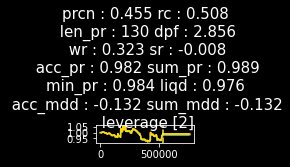

In [ ]:
try:
  # start_0 = time.time()
  long_pr = get_pr(OrderSide.BUY, *long_obj[:2], long_lvrg_arr, long_fee_arr, inversion)
  long_total_pr = to_total_pr(len_df, long_pr, long_obj[-2])
  long_cum_pr = np.cumprod(long_total_pr)
  long_liqd = liquidation(OrderSide.BUY, l, long_obj[:4], long_lvrg_arr, long_fee_arr)
  long_prcn, long_rc = precision(long_pr, long_true_bias_idx), recall(long_true_bias_idx)

  if signi:
    long_idep_res_obj = (long_prcn, long_rc) + get_res_info_nb_v2(sample_len, long_pr, long_total_pr, long_cum_pr, long_liqd)
  else:
    gs_idx = plot_info_v4(gs, gs_idx, sample_len, long_pr, long_total_pr, long_cum_pr, long_liqd, long_prcn, long_rc, long_lvrg_arr[-1], title_position, fontsize)
  # print("elapsed time :", time.time() - start_0)
except Exception as e:
  gs_idx += 1
  print(e)

# plt.show()

In [ ]:
def precision(pr_list, true_idx):
  true_bias_pr = pr_list[true_idx].ravel()
  return np.sum(true_bias_pr > 1) / len(true_bias_pr)  # 차원을 고려한 계산

def recall(true_idx):
  return np.sum(true_idx) / len(true_idx) #  2.16 µs per loop (len) --> 3.78 µs per loop   # false_idx 중에서 tp 체결된 건을 더해주어야함

def plot_info_v4(gs, gs_idx, sample_len, pr, total_pr, cum_pr, liqd, prcn, rc, leverage, title_position, fontsize):
  try:
    plt.subplot(gs[gs_idx])
    idep_res_obj = get_res_info_nb_v2(sample_len, pr, total_pr, cum_pr, liqd)
    plt.plot(cum_pr)
    plt.plot(idep_res_obj[-1], color='gold')
    if sample_len is not None:
      plt.axvline(sample_len, alpha=1., linestyle='--', color='#ffeb3b')
    # title_str = "prcn : {:.3f} rc : {:.3f}\n len_pr : {} dpf : {:.3f}\n wr : {:.3f} sr : {:.3f}\n acc_pr : {:.3f} sum_pr : {:.3f}\n" +\
    #           "min_pr : {:.3f} liqd : {:.3f}\n acc_mdd : -{:.3f} sum_mdd : -{:.3f}\n leverage {}"
    title_str = "prcn : {:.3f}\n rc : {:.3f}\n len_pr : {}\n dpf : {:.3f}\n wr : {:.3f}\n sr : {:.3f}\n acc_pr : {:.3f}\n sum_pr : {:.3f}\n" +\
              "min_pr : {:.3f}\n liqd : {:.3f}\n acc_mdd : -{:.3f}\n sum_mdd : -{:.3f}\n leverage {}"
    plt.title(title_str.format(prcn, rc, *idep_res_obj[:-1], leverage), position=title_position, fontsize=fontsize)
  except Exception as e:
    print("error in plot_info :", e)

  return gs_idx + 1

## plot_check_v2

In [ ]:
# ------------------ plot_config ------------------ #
save_mode = 0
front_plot = 0    # 0, 1, 2 (whole, open, ep_tick)
bias_plot = 0     # precision check : 1, recall check : 0
pr_descend = 1    # 1 -> 내림차순
position = 1      # -1 / 1, 0 (short / long)
# tf_plot = 1       # true - false plot
# pr_sort = 1     # -> default 1,  이상한 체결 확인하기 좋음
# wl_case = 1     # 1 / -1 / 0 (win loss study) --> oid

x_max = 500
x_margin_mult = 1/30
y_margin_mult = 1/30  # 0 

prev_plotsize = 100 # 20 100
post_plotsize = 60
# post_plotsize = config.tr_set.end_tick

inversion = 0
hedge = 0

# ------ show or save ------ #
if save_mode:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".ftr", "")
  shutil.rmtree(plot_check_dir, ignore_errors=True)  # remove existing dir
  os.makedirs(plot_check_dir)
  print(plot_check_dir)
else:
  plot_check_dir = None

# ------------ 한 방향에 대해 plot_check 함 (by position var.) ------------ #
#   obj by position  
if position == -1:
  pos_str = "SELL"
  pr_, obj_ = short_pr, short_obj
  arr_list = [short_lvrg_arr, short_fee_arr, short_tpout_arr, short_bias_arr]
else:   # both option currently not supported
  pos_str = "BUY"
  pr_, obj_ = long_pr, long_obj
  arr_list = [long_lvrg_arr, long_fee_arr, long_tpout_arr, long_bias_arr]
pr, obj, [lvrg_arr, fee_arr, tpout_arr, bias_arr] = sort_bypr_v3(pr_, obj_, arr_list, descending=pr_descend)

pr_msg = "%s\n {} ~ {} -> {:.5f}\n lvrg : {}\n fee : {:.4f}" % (pos_str)  # pos_str 으로 이곳에서 정의함

# ------------------ data chunknize ------------------ #
np_df = res_df.to_numpy()

left_end_idx = obj[2] - prev_plotsize  # left_margin 기준 - entry_idx
right_end_idx = obj[3] + post_plotsize
invalid_left_end = np.sum(left_end_idx < 0)

np_plot_params = np.hstack((left_end_idx, right_end_idx, pr, *obj, lvrg_arr, fee_arr, tpout_arr, bias_arr))[invalid_left_end:]
if bias_plot:
  bias_arr_ = bias_arr[invalid_left_end:]
  if position == -1:
    bias_idx = bias_arr_[:, 0] < bias_arr_[:, 1]
  else:
    bias_idx = bias_arr_[:, 0] > bias_arr_[:, 1]
  np_plot_params = np_plot_params[bias_idx]

In [ ]:
# ------------ make col_idx_dict config ------------ #
nonstep_col_list = []
step_col_list = []
stepmark_col_list = []
# ------ set period ------ #
hc_itv1 = '5T'
hc_itv2 = '15T'

rs_itv = 'T'
dc_itv = 'T'
hdc_itv = '5T'
hhdc_itv = 'H'

sd_dc_itv = 'T'
sd_dc_period1, sd_dc_period2 = 20, 40

bb_itv = dc_itv
hbb_itv = hdc_itv
hhbb_itv = hhdc_itv

# ------ nonstep_col_list - add info(col, alpha, color, linewidth) ------ #
# nonstep_col_list.append([['close'], 1, '#ffffff', 2])

# ------ step_col_list - add info(col, alpha, color, linewidth) ------ #
# step_col_list.append([['open_{}'.format(hc_itv1), 'close_{}'.format(hc_itv1)], 1, '#ffffff', 2])
# step_col_list.append([['open_{}'.format(hc_itv2), 'close_{}'.format(hc_itv2)], 1, '#ffffff', 4])

# step_col_list.append([['resi_{}'.format(rs_itv), 'sup_{}'.format(rs_itv)], 1, '#ffeb3b', 1])
# step_col_list.append([['resi_out_{}'.format(rs_itv), 'sup_out_{}'.format(rs_itv)], 1, 'dodgerblue', 2])

# step_col_list.append([['dc_upper_{}'.format(dc_itv), 'dc_lower_{}'.format(dc_itv)], 1, '#ffeb3b', 2])
# step_col_list.append([['dc_upper_{}'.format(hdc_itv), 'dc_lower_{}'.format(hdc_itv)], 1, '#e65100', 2])
# step_col_list.append([['dc_upper_{}'.format(hhdc_itv), 'dc_lower_{}'.format(hhdc_itv)], 1, '#c2185b', 4])
step_col_list.append([['dc_upper_{}{}'.format(sd_dc_itv, sd_dc_period1), 'dc_lower_{}{}'.format(sd_dc_itv, sd_dc_period1)], 1, '#ffeb3b', 2])
step_col_list.append([['dc_upper_{}{}'.format(sd_dc_itv, sd_dc_period2), 'dc_lower_{}{}'.format(sd_dc_itv, sd_dc_period2)], 1, '#e65100', 2])
step_col_list.append([['short_base_{}'.format(sd_dc_itv)], 1, '#e70f20', 2])
step_col_list.append([['long_base_{}'.format(sd_dc_itv)], 1, '#279e2c', 2])

# step_col_list.append([['bb_upper_{}'.format(bb_itv), 'bb_lower_{}'.format(bb_itv)], 1, '#ffffff', 1])
# step_col_list.append([['bb_upper_{}'.format(hbb_itv), 'bb_lower_{}'.format(hbb_itv)], 1, '#ff00ff', 2])
# step_col_list.append([['bb_upper_{}'.format(hhbb_itv), 'bb_lower_{}'.format(hhbb_itv)], 1, '#3179f5', 4])

# step_col_list.append([['ema_5T'], 1, '#03ed30', 2])

# ------ stepmark_col_list - add info(col, alpha, color, linewidth) ------ #
# stepmark_col_list.append([['sar_T'], 1, 'dodgerblue', 7])


# ------ str to numbcol ------ #
nonstep_col_arr = strcol_tonumb(res_df, nonstep_col_list)
step_col_arr = strcol_tonumb(res_df, step_col_list)
stepmark_col_arr = strcol_tonumb(res_df, stepmark_col_list)

col_idx_dict = \
{
  "ohlc_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close']),
  "vp_col_idxs": get_col_idxs(res_df, ['close', 'volume']),
  # "ohlc_col_idxs": get_col_idxs(res_df, ['haopen', 'hahigh', 'halow', 'haclose']),  # heikin-ashi ver.
  "nonstep_col_info": nonstep_col_arr,
  "step_col_info": step_col_arr,
  "stepmark_col_info": stepmark_col_arr,
  "ylim_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close'])  # , 'dc_upper_H', 'dc_lower_H', 'dc_upper_15T', 'dc_lower_15T'
}

/content/drive/My Drive/Colab Notebooks/JnQ/funcs/funcs_plot_check.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  step_col_arr = np.array(col_list)


### plot

In [ ]:
_ = [plot_check_v3(np_df, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, front_plot, plot_check_dir, **col_idx_dict) for param_zip in zip(np_plot_params, np_plot_params[::-1])]

Output hidden; open in https://colab.research.google.com to view.

### plot_funcs

In [ ]:
def plot_check_v3(data, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, front_plot, plot_check_dir=None, **col_idx_dict):
  # start_0 = time.time()
  plt.style.use(['dark_background', 'fast'])
  fig = plt.figure(figsize=(30, 18))
  nrows, ncols = 2, 2
  gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                         ncols=ncols,
                         height_ratios=[3, 1]
                         )
  for gs_idx, params in enumerate(param_zip):
    ax = fig.add_subplot(gs[gs_idx])
    iin, iout, pr, ep, tp, entry_idx, exit_idx, open_idx, lvrg, fee, tp_line, out_line, bias_info, bias_thresh = params

    # ------------ add_col section ------------ #
    a_data = data[int(iin):int(iout)]
    # a_data = data[iin:iout]
    # ------ candles ------ #
    candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax, alpha=1.0, wickwidth=1.0)

    # ------ add cols ------ #
    [nonstep_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['nonstep_col_info']]
    [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]
    [stepmark_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['stepmark_col_info']]

    # ------ ep, tp + xlim ------ #
    eptp_hvline_v3(config, ep, tp, entry_idx, exit_idx, open_idx, tp_line, out_line, bias_info, bias_thresh,
                   front_plot, iin, iout, x_max, x_margin_mult, y_margin_mult, a_data, **col_idx_dict)

    #     Todo    #
    #     3. outer_price plot 일 경우, gs_idx + nrows 하면 됨

    # ------ trade_info ------ #
    plt.title(pr_msg.format(entry_idx, exit_idx, pr, lvrg, fee))

  if plot_check_dir is None:
    plt.show()
    print()
  else:
    fig_name = plot_check_dir + "/%s.png" % int(entry_idx)
    plt.savefig(fig_name)
    print(fig_name, "saved !")
  plt.close()
  # print("elapsed time :", time.time() - start_0)

  return

def eptp_hvline_v3(config, en_p, ex_p, entry_idx, exit_idx, open_idx, tp_line, out_line, bias_info, bias_thresh,
                   front_plot, iin, iout, x_max, x_margin_mult, y_margin_mult, a_data, **col_idx_dict):
  # ------ get vertical ticks ------ #
  entry_tick = int(entry_idx - iin)
  open_tick = entry_tick - int(entry_idx - open_idx)
  exit_tick = entry_tick + int(exit_idx - entry_idx)

  if front_plot == 1:
    x_max = open_tick
  elif front_plot == 2:
    x_max = entry_tick
  if (iout - iin) > x_max:
    x_margin = x_max * x_margin_mult
    plt.xlim(0 - x_margin, x_max + x_margin)
  x0, x1 = plt.gca().get_xlim()
  # ------------ hlines ------------ #
  # ------ entry & exit ------ #
  en_xmin = entry_tick / x1
  ex_xmin = exit_tick / x1
  plt.axhline(en_p, x0, en_xmin, linewidth=2, linestyle='--', alpha=1, color='lime')  # en_p line axhline
  plt.text(x0, en_p, 'en_p :\n {}'.format(en_p), ha='right', va='center', fontweight='bold')  # en_p line label
  plt.axhline(ex_p, ex_xmin, 1, linewidth=2, linestyle='--', alpha=1, color='lime')  # ex_p line axhline (signal 도 포괄함, 존재 의미)
  plt.text(x1, ex_p, 'ex_p :\n {}'.format(ex_p), ha='left', va='center', fontweight='bold')  # ex_p line label

  # ------ tpout_line ------ #
  plt.axhline(tp_line, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='#00ff00')  # ep 와 gap 비교 용이하기 위해 ex_xmin -> 0.1 사용
  plt.text(x0, tp_line, '%s' % config.tr_set.tp_gap, ha='right', va='center', fontweight='bold', fontsize=15)
  plt.axhline(out_line, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='#ff0000')
  plt.text(x0, out_line, '%s' % config.tr_set.out_gap, ha='right', va='center', fontweight='bold', fontsize=15)

  # ------ bias_line ------ #
  plt.axhline(bias_info, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='dodgerblue')
  plt.text(x0, bias_info, ' bias_info', ha='left', va='center', fontweight='bold')
  plt.axhline(bias_thresh, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='#ff8400')
  plt.text(x0, bias_thresh, ' bias_thresh', ha='left', va='center', fontweight='bold')

  # ------ ylim ------ #
  if front_plot:
    y_lim_data = a_data[:x_max + 1, col_idx_dict['ylim_col_idxs']]  # +1 for including open_tick
  else:
    y_lim_data = a_data[:, col_idx_dict['ylim_col_idxs']]
  y_min = y_lim_data.min()
  y_max = y_lim_data.max()
  y_margin = (y_max - y_min) * y_margin_mult
  plt.ylim(y_min - y_margin, y_max + y_margin)

  # ------------ vline (open_tick, entry_tick, exit_tick) ------------ #
  y0, y1 = plt.gca().get_ylim()
  l_data = a_data[:exit_tick + 1, col_idx_dict['ohlc_col_idxs'][2]]  # +1 for including exit_tick
  open_ymax, en_ymax, ex_ymax = [(l_data[tick_] - y0) / (y1 - y0) - .01 for tick_ in [open_tick, entry_tick, exit_tick]]  # -.05 for margin
  plt.axvline(open_tick, 0, open_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')  # 추후, tick 별 세부 정의가 달라질 수 있음을 고려해 multi_line 작성 유지
  plt.axvline(entry_tick, 0, en_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')
  plt.axvline(exit_tick, 0, ex_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')

  return

#### legacy

In [ ]:
_ = [plot_check_v4(np_df, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, front_plot, plot_check_dir, 500, 0.07, 100, **col_idx_dict) for param_zip in zip(np_plot_params, np_plot_params[::-1])]

In [ ]:
def plot_check_v4(data, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, front_plot, plot_check_dir=None, vp_range=500, kde_factor=0.05, num_samples=100, **col_idx_dict):
  # start_0 = time.time()
  plt.style.use(['dark_background', 'fast'])
  fig = plt.figure(figsize=(30, 18))
  nrows, ncols = 2, 2
  gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                         ncols=ncols,
                         height_ratios=[3, 1]
                         )
  for gs_idx, params in enumerate(param_zip):
    ax = fig.add_subplot(gs[gs_idx])
    iin, iout, pr, ep, tp, entry_idx, exit_idx, open_idx, lvrg, fee, tp_line, out_line, bias_info, bias_thresh = params

    # ------------ add_col section ------------ #
    iin, iout = int(iin), int(iout)
    a_data = data[iin:iout]
    # ------ candles ------ #
    candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax, alpha=1.0, wickwidth=1.0)
    
    # ------ add cols ------ #
    [nonstep_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['nonstep_col_info']]
    [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]
    [stepmark_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['stepmark_col_info']]

    # vp_data = data[iin - vp_range:iin, col_idx_dict['vp_col_idxs']]
    # vp_info = [vp_range, vp_data[:, 0], vp_data[:, 1], kde_factor, num_samples]
    vp_data = data[iin - vp_range:iin, col_idx_dict['vp_col_idxs']].T
    vp_info = [vp_range, *vp_data, kde_factor, num_samples]

    # ------ ep, tp + xlim ------ #
    eptp_hvline_v4(config, ep, tp, entry_idx, exit_idx, open_idx, tp_line, out_line, bias_info, bias_thresh, 
                   front_plot, iin, iout, x_max, x_margin_mult, y_margin_mult, a_data, vp_info, **col_idx_dict)        

    #     Todo    #
    #     3. outer_price plot 일 경우, gs_idx + nrows 하면 됨

    # ------ trade_info ------ #
    plt.title(pr_msg.format(entry_idx, exit_idx, pr, lvrg, fee))

  if plot_check_dir is None:
    plt.show()
    print()
  else:
    fig_name = plot_check_dir +  "/%s.png" % int(entry_idx)
    plt.savefig(fig_name)
    print(fig_name, "saved !")
  plt.close()
  # print("elapsed time :", time.time() - start_0)  

  return

def eptp_hvline_v4(config, en_p, ex_p, entry_idx, exit_idx, open_idx, tp_line, out_line, bias_info, bias_thresh, 
                   front_plot, iin, iout, x_max, x_margin_mult, y_margin_mult, a_data, vp_info, **col_idx_dict):
  # ------ get vertical ticks ------ #
  entry_tick = int(entry_idx - iin)
  open_tick = entry_tick - int(entry_idx - open_idx)
  exit_tick = entry_tick + int(exit_idx - entry_idx)

  if front_plot == 1:
    x_max = open_tick
  elif front_plot == 2:
    x_max = entry_tick
  if (iout - iin) > x_max:
    x_margin = x_max * x_margin_mult
    plt.xlim(0 - x_margin, x_max + x_margin)
  x0, x1 = plt.gca().get_xlim()
  # ------------ hlines ------------ #
  # ------ entry & exit ------ #
  en_xmin = entry_tick / x1
  ex_xmin = exit_tick / x1
  plt.axhline(en_p, x0, en_xmin, linewidth=2, linestyle='--', alpha=1, color='lime')  # en_p line axhline
  plt.text(x0, en_p, ' en_p :\n {}'.format(en_p), ha='right', va='center', fontweight='bold')  # en_p line label
  plt.axhline(ex_p, ex_xmin, 1, linewidth=2, linestyle='--', alpha=1, color='lime')  # ex_p line axhline (signal 도 포괄함, 존재 의미)
  plt.text(x1, ex_p, ' ex_p :\n {}'.format(ex_p), ha='left', va='center', fontweight='bold')  # ex_p line label

  # ------ tpout_line ------ #
  plt.axhline(tp_line, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='#00ff00')  # ep 와 gap 비교 용이하기 위해 ex_xmin -> 0.1 사용
  plt.text(x0, tp_line, ' %s' % config.tr_set.tp_gap, ha='left', va='center', fontweight='bold')
  plt.axhline(out_line, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='#ff0000')
  plt.text(x0, out_line, ' %s' % config.tr_set.out_gap, ha='left', va='center', fontweight='bold')

  # ------ bias_line ------ #
  plt.axhline(bias_info, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='dodgerblue')
  plt.text(x0, bias_info, ' bias_info', ha='left', va='center', fontweight='bold')
  plt.axhline(bias_thresh, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='#ff8400')
  plt.text(x0, bias_thresh, ' bias_thresh', ha='left', va='center', fontweight='bold')

  # ------ volume profile ------ #
  vp_range, close, volume, kde_factor, num_samples = vp_info
  if iin >= vp_range:
    start_0 = time.time()
    kde = stats.gaussian_kde(close, weights=volume, bw_method=kde_factor)
    kdx = np.linspace(close.min(), close.max(), num_samples)
    kdy = kde(kdx)
    print("kde elapsed_time :", time.time() - start_0)

    kdy_max = kdy.max()
    # peaks,_ = signal.find_peaks(kdy)
    peaks,_ = signal.find_peaks(kdy, prominence=kdy_max * 0.3)
    peak_list = kdx[peaks]   # peak_list
    [plt.axhline(peak, linewidth=6, linestyle='-', alpha=1, color='white') for peak in peak_list]
    
    kdy_ratio = entry_tick / kdy_max # 30 / 0.0001
    plt.plot(kdy * kdy_ratio, kdx, color='white')
    # plt.plot(pky, pkx, 'bo', color='yellow')

  # ------ ylim ------ #
  if front_plot:
    y_lim_data = a_data[:x_max + 1, col_idx_dict['ylim_col_idxs']]  # +1 for including open_tick
  else:
    y_lim_data = a_data[:, col_idx_dict['ylim_col_idxs']]
  y_min = y_lim_data.min()
  y_max = y_lim_data.max()
  y_margin = (y_max - y_min) * y_margin_mult
  # plt.ylim(y_min - y_margin, y_max + y_margin)

  # ------------ vline (open_tick, entry_tick, exit_tick) ------------ #
  y0, y1 = plt.gca().get_ylim()
  l_data = a_data[:exit_tick + 1, col_idx_dict['ohlc_col_idxs'][2]]  # +1 for including exit_tick
  open_ymax, en_ymax, ex_ymax = [(l_data[tick_] - y0) / (y1 - y0) - .01 for tick_ in [open_tick, entry_tick, exit_tick]]  # -.05 for margin
  plt.axvline(open_tick, 0, open_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')  # 추후, tick 별 세부 정의가 달라질 수 있음을 고려해 multi_line 작성 유지
  plt.axvline(entry_tick, 0, en_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')
  plt.axvline(exit_tick, 0, ex_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')

  return

### sync_check

In [ ]:
save_plot = 0

open_idx_range = reversed(range(0, len(res_df), 1000))
plot_range = 100

x_max = 400

inversion = 0
hedge = 0


if save_plot:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".ftr", "")
  try:
    os.mkdir(plot_check_dir)
  except:

    #     remove existing dir   #
    shutil.rmtree(plot_check_dir)
    print(plot_check_dir, 'removed !')
    os.mkdir(plot_check_dir)
    # pass
    

prev_plotsize = 30
post_plotsize = 20



h_candle_intv1 = 15
h_candle_intv2 = 60
if 'hopen_{}'.format(h_candle_intv2) not in res_df.columns:
  res_df = h_candle(res_df, h_candle_intv1)
  res_df = h_candle(res_df, h_candle_intv2)

res_df["ma30_1m"] = res_df['close'].rolling(30).mean()
res_df["ma60_1m"] = res_df['close'].rolling(60).mean()

res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line)
# res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=1, use_dtk_line=1)
# break

rtc_list = ["short_tp_1_{}".format(strat_version), "short_tp_gap_{}".format(strat_version), "long_tp_1_{}".format(strat_version), "long_tp_gap_{}".format(strat_version)]
# h_rtc_list = ["h_short_tp_1", "h_short_tp_gap", "h_long_tp_1", "h_long_tp_gap"]
dtk_list = ["short_dtk_1_{}".format(strat_version), "short_dtk_gap_{}".format(strat_version), "long_dtk_1_{}".format(strat_version), "long_dtk_gap_{}".format(strat_version),
            # "short_dtk_1_line", "short_dtk_gap_line", "long_dtk_1_line", "long_dtk_gap_line",
            "short_dtk_plot_1", "short_dtk_plot_gap", "long_dtk_plot_1", "long_dtk_plot_gap"]
dc_v2_list = ['dc_upper_v2_{}'.format(strat_version), 'dc_lower_v2_{}'.format(strat_version)]


ohlc_list = ['open', 'high', 'low', 'close'] # + basic_st_list
hcandle_list = ['hopen_%s' % h_candle_intv1, 'hclose_%s' % h_candle_intv1, 'hopen_%s' % h_candle_intv2, 'hclose_%s' % h_candle_intv2]
# hcandle_list = ['hopen_%s' % h_candle_intv1, 'hclose_%s' % h_candle_intv1, 'hhigh_%s' % h_candle_intv2, 'hlow_%s' % h_candle_intv2]

# --------------------- dc & bb level --------------------- #
dc_interval = '1m'
hdc_interval = '5m'
hhdc_interval = '15m'

st_list = ['st_base_%s' % hhdc_interval, 'st_upper_%s' % hhdc_interval, 'st_lower_%s' % hhdc_interval]

dc_list = ['dc_upper_%s' % dc_interval, 'dc_lower_%s' % dc_interval]
hdc_list = ['dc_upper_%s' % hdc_interval, 'dc_lower_%s' % hdc_interval]
hhdc_list = ['dc_upper_%s' % hhdc_interval, 'dc_lower_%s' % hhdc_interval]

bb_interval = dc_interval
hbb_interval = hdc_interval
hhbb_interval = hhdc_interval

bb_list = ['bb_upper_%s' % bb_interval, 'bb_lower_%s' % bb_interval]
hbb_list = ['bb_upper_%s' % hbb_interval, 'bb_lower_%s' % hbb_interval]
hhbb_list = ['bb_upper_%s' % hhbb_interval, 'bb_lower_%s' % hhbb_interval]

bbwp_list = ['bbwp', 'bbwp_ma']


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1']
senkoub_list = ['senkou_b1']

sar_list = ['sar_3m', 'sar_5m', 'sar_15m']

ma_list = ['ma30_1m', 'ma60_1m']
sma_list = ['sma_1m']

ema_list = ['ema_5m']
# cb_list = ['cloud_bline_1m']
cb_list = ['cloud_bline_30m']
# cb_list = ['cloud_bline_5m']



# -------------- under price phase -------------- #
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
# trix_list = ['trix1', 'trix2', 'trix3']
# stoch_list = ['stoch_5m']
# fisher_list = ['fisher30', 'fisher60', 'fisher120']
# cctbbo_list = ['cctbbo']
# emaroc_list = ['ema_roc']
rsi_list = ['rsi_%s' % config.loc_set.point.exp_itv] 
cci_list = ['cci_%s' % config.loc_set.point.exp_itv] 


# -------------- summation -------------- #
# input_colname = ohlc_list + basic_st_list + pline_list + bb_list + hbb_list + sma_list + cb_list + stoch_list + sar_list + dc_list
input_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + hhdc_list + dtk_list + dc_v2_list + rsi_list + ema_list + ma_list + st_list# + cci_list

# yrange_colname = ohlc_list + basic_st_list + pline_list # currently just used for ymin, ymax
yrange_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + hhdc_list + dc_v2_list + ema_list # currently just used for ymin, ymax
yrange_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + dc_v2_list + ema_list # currently just used for ymin, ymax



odd_cnt = 0
obj_i = -1
rev_obj_i = 0

#   지금, continue 발생시 true / false idx 가 같이 상승하는 문제

# while 1:
for open_idx in open_idx_range:

  # if obj_i >= len_obj or rev_obj_i >= len_obj:
  #   break

  # if odd_cnt % 2 == 1 and tf_plot: #  loss plot 을 채워야하는 상황
  #   rev_obj_i += 1

  # else:
  #   obj_i += 1

  if not(i >= prev_plotsize):
    continue
  

  odd_cnt += 1

  # break

  print("open_idx :", open_idx)
  
  plot_df = res_df.iloc[open_idx - prev_plotsize:open_idx + plot_range + post_plotsize][input_colname]
  
  odds = 1 if odd_cnt % 2 == 1 else 2
  if odds == 1:

    plt.style.use('dark_background')

    fig = plt.figure(figsize=(26, 18))
    
    gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                        ncols=2, # col 몇 개 
                        height_ratios=[3, 1]
                        )
    
  ax = fig.add_subplot(gs[odds - 1])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='#26a69a', colordown='#ef5350', alpha=0.5)

  # ---------- h_candle ---------- #
  alpha = 1
  lw = 1
  for cd_i, candle in enumerate(hcandle_list):

    if cd_i == 2:
      lw = 2      
    plt.step(np.arange(len(plot_df)), plot_df[candle].values, alpha=alpha, color='#ffffff', linewidth=lw)

  # alpha = 0.1
  # plt.fill_between(np.arange(len(plot_df)), plot_df['hclose_60'].values, plot_df['hopen_60'].values, 
  #                     where=1, facecolor='#ffffff', alpha=alpha)  
  

   # --------- ma --------- #
  alpha = 1
  lw = 2
  for ma_i, item in enumerate(ma_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

   # --------- ema --------- #
  alpha = 1
  lw = 4
  for sm_i, item in enumerate(ema_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#03ed30', linewidth=lw)
    
   # --------- st --------- #
  alpha = 1
  lw = 2
  for sm_i, item in enumerate(st_list):
      plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#00ff00', linewidth=lw)

  # ---------------------- dc_v2 ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(dc_v2_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

  # # ---------------------- dc ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(dc_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

  # # ---------------------- hdc ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(hdc_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#e65100', linewidth=lw)

  # # ---------------------- hhdc ---------------------- #
  # alpha = 1
  # lw = 4
  # for sm_i, item in enumerate(hhdc_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#c2185b', linewidth=lw)


  # # ---------------------- bb ---------------------- #
  # alpha = 1
  # lw = 1
  # for sm_i, item in enumerate(bb_list):
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffffff', linewidth=lw)

  # alpha = 0.2
  # plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % bb_interval].values, plot_df['bb_lower_%s' % bb_interval].values, 
  #                     where=plot_df['bb_upper_%s' % bb_interval].values >= plot_df['bb_lower_%s' % bb_interval].values, facecolor='#ffffff', alpha=alpha)   

  # # ---------------------- hbb ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(hbb_list):
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ff00ff', linewidth=lw)
  
  # alpha = 0.2
  # plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % hbb_interval].values, plot_df['bb_lower_%s' % hbb_interval].values, 
  #                     where=plot_df['bb_upper_%s' % hbb_interval].values >= plot_df['bb_lower_%s' % hbb_interval].values, facecolor='#ff00ff', alpha=alpha) 
  
  # # ---------------------- hhbb ---------------------- #

  # alpha = 1
  # lw = 4
  # for sm_i, item in enumerate(hhbb_list):
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#3179f5', linewidth=lw)
  
  # alpha = 0.2
  # plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % hhbb_interval].values, plot_df['bb_lower_%s' % hhbb_interval].values, 
  #                     where=plot_df['bb_upper_%s' % hhbb_interval].values >= plot_df['bb_lower_%s' % hhbb_interval].values, facecolor='#3179f5', alpha=alpha) 
  
  # ------------------- dtk_line (old, tp_line) ------------------- #
  
  # alpha = 1
  # lw = 2
  # rtc_ratio_list = [config.loc_set.zone.dt_k]
  
  # for rtc_k in rtc_ratio_list:    
  #   # plt.step(np.arange(len(plot_df)), plot_df['short_dtk_1_line'].values - plot_df['short_dtk_gap_line'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   # plt.step(np.arange(len(plot_df)), plot_df['long_dtk_1_line'].values + plot_df['long_dtk_gap_line'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   plt.step(np.arange(len(plot_df)), plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   plt.step(np.arange(len(plot_df)), plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)

  # hy_min = np.min(plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * rtc_k)
  # hy_max = np.max(plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * rtc_k)  

  # alpha = 1
  # lw = 4
  # # h_rtc_ratio_list = [config.loc_set.zone.dt_k]
  # h_rtc_ratio_list = [config.loc_set.zone.zone_dt_k]
  # # h_rtc_ratio_list = [0.272, 0.36, 0.4, 0.5]
  
  # for h_rtc_k in h_rtc_ratio_list:
  #   plt.step(np.arange(len(plot_df)), plot_df['short_dtk_plot_1'].values - plot_df['short_dtk_plot_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   plt.step(np.arange(len(plot_df)), plot_df['long_dtk_plot_1'].values + plot_df['long_dtk_plot_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   # plt.step(np.arange(len(plot_df)), plot_df['h_short_tp_1'].values - plot_df['h_short_tp_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   # plt.step(np.arange(len(plot_df)), plot_df['h_long_tp_1'].values + plot_df['h_long_tp_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)

  # # hy_min = np.min(plot_df['short_dtk_plot_1'].values - plot_df['short_dtk_plot_gap'].values * h_rtc_k)
  # # hy_max = np.max(plot_df['long_dtk_plot_1'].values + plot_df['long_dtk_plot_gap'].values * h_rtc_k)  

  # ------------- y lim ------------- #  
  y_max = max(np.max(plot_df[yrange_colname]))
  y_min = min(np.min(plot_df[yrange_colname]))
  # y_max = max(y_max, y_max_)
  # y_min = min(y_min, y_min_)
  
  # hy_min = np.min(plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * 0.36)
  # hy_max = np.max(plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * 0.36)  
  # y_max = max(y_max, y_max_, hy_max)
  # y_min = min(y_min, y_min_, hy_min)

  if np.isnan(y_max) or np.isnan(y_min):
    print('continued in yminmax')
    continue
  # print("y_max, y_min :", y_max, y_min)
  # break

  plt.ylim(y_min, y_max)


  # ---------------------- plot ---------------------- #

  #           rsi          #    
  plt.subplot(gs[odds + 1])
  alpha = 1
  for rsi_ in rsi_list:
    plt.step(np.arange(len(plot_df)), plot_df[rsi_].values, 'g', alpha=alpha)
    # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
    alpha -= 0.2
  plt.axhline(50, linestyle='--')
  plt.axhline(50 + config.loc_set.point.osc_band, linestyle='--')
  plt.axhline(50 - config.loc_set.point.osc_band, linestyle='--')
  
  plt.axvline(prev_plotsize, linestyle='--')
  
  #           cci          #    
  # plt.subplot(gs[odds + 1])
  # alpha = 1
  # for cci_ in cci_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cci_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axhline(config.loc_set.point.osc_band, linestyle='--')
  # plt.axhline(-config.loc_set.point.osc_band, linestyle='--')
  
  # plt.axvline(prev_plotsize, linestyle='--')


  if len(plot_df) > x_max:
    x_margin = x_max / 20
    plt.xlim(0 - x_margin, x_max + x_margin)


  if not save_plot:
    if odds == 2:
      plt.show()
      plt.close()
  
  else:
    # ---------- save mode ---------- #
    fig_name = plot_check_dir +  "/%s.png" % t_i
    plt.savefig(fig_name)
    print(fig_name, "saved !")

  # plt.close()  
  print()

  # break


### brief np_pr survey

In [ ]:
# plot_pr_list[:100]
plt.plot(np_pr)
plt.axhline(1)
plt.show()

### close & pr comp.

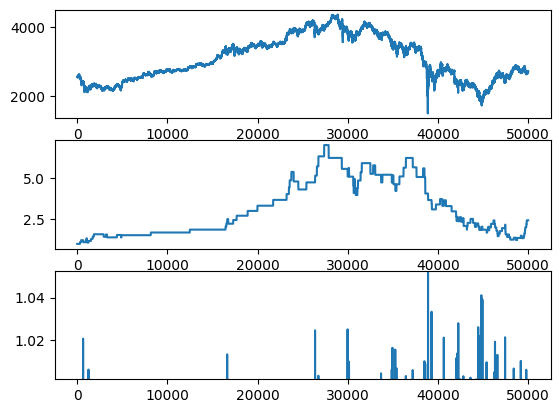

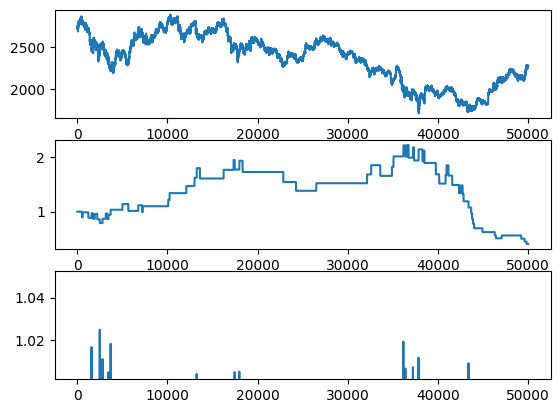

In [ ]:
#     chunky survey 필요함    #
chunk_size = 50000

sync_pr = np.ones(len(res_df))
sync_tr = np.zeros(len(res_df))
# sync_tr = np.empty(len(res_df))
# sync_tr[:] = np.nan

max_tr = np.max(tp_ratio_list)
min_tr = np.min(tp_ratio_list)

for ck_i in range(0, len(res_df), chunk_size):

  chunked_df = res_df.iloc[ck_i:ck_i + chunk_size]
  # break

  for pr_, eptp_idx, tr_ in zip(pr_list[ck_i:ck_i + chunk_size], trade_list[ck_i:ck_i + chunk_size], tp_ratio_list[ck_i:ck_i + chunk_size]):
    # print(pr_, eptp_idx)
    sync_pr[eptp_idx[-1][0]] = pr_
    sync_tr[eptp_idx[-1][0]] = tr_
    # break

  chunked_pr = sync_pr[ck_i:ck_i + chunk_size]
  chunked_tr = sync_tr[ck_i:ck_i + chunk_size]
  chunked_tr = np.where(np.isnan(chunked_tr), pd.Series(chunked_tr).shift(1), chunked_tr)

  # plt.figure(figsize=(8, 6))

  plt.subplot(311)
  plt.plot(np.arange(len(chunked_df)), chunked_df['close'])
  # plt.show()

  plt.subplot(312)
  plt.plot(np.cumprod(chunked_pr))
  
  plt.subplot(313)
  plt.plot(chunked_tr)
  plt.ylim(min_tr + 0.5 * (max_tr - min_tr), max_tr)
  
  plt.show()
  print()


### plot indi. legacy

In [ ]:

  # ---------------------- ma ---------------------- #
   # --------- ema --------- #
  # alpha = 1
  # for sm_i, item in enumerate(ema_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#03ed30', linewidth=lw)
  #   alpha -= 0.2

  #   # --------- sma --------- #
  # alpha = 1
  # for sm_i, sma in enumerate(sma_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 4
  #   plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='#e91e63', linewidth=lw)
  #   alpha -= 0.2

  
  # ---------------------- cb ---------------------- #
  # alpha = 1
  # for sm_i, item in enumerate(cb_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#5b9cf6', linewidth=lw)
  #   alpha -= 0.2


  
  # ---------------------- sar ---------------------- #
  # alpha = 1
  # markersize = 5
  # for sar in sar_list:
  #   plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
  #   markersize += 1
  #   alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  # alpha = 0.7
  # for senkoua, senkoub in zip(senkoua_list, senkoub_list):
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
  #                     where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
  #                     where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
  #   alpha -= 0.05
  


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch_ in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- ema_roc ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for emaroc in emaroc_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[emaroc].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')
  
  # ---------- bbw ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for bbwp_ in bbwp_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[bbwp_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(bbwp_thresh, linestyle='--')

  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')



### plot nontp case

## legacy

### shifting

In [ ]:
org_res_df = res_df.copy()

In [ ]:
#         refresh res_df      #
res_df = org_res_df.copy()
print(org_res_df.tail(5))

# break


shift_size = -4
# shift_size = -1
# shift_size = -7
# shift_size = +3

res_df['min_upper'] = res_df['min_upper'].shift(shift_size)
res_df['max_lower'] = res_df['max_lower'].shift(shift_size)
res_df['minor_ST1_Trend'] = res_df['minor_ST1_Trend'].shift(shift_size)
res_df['minor_ST2_Trend'] = res_df['minor_ST2_Trend'].shift(shift_size)
res_df['minor_ST3_Trend'] = res_df['minor_ST3_Trend'].shift(shift_size)
res_df['middle_line'] = res_df['middle_line'].shift(shift_size)

print(res_df.tail(5))

                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272145    0.27005
2021-06-30 23:56:59.999  0.27274  0.27290  ...   0.272145    0.27005
2021-06-30 23:57:59.999  0.27246  0.27257  ...   0.272523    0.27021
2021-06-30 23:58:59.999  0.27166  0.27183  ...   0.272523    0.27021
2021-06-30 23:59:59.999  0.27144  0.27211  ...   0.272523    0.27021

[5 rows x 37 columns]
                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272523    0.27021
2021-06-30 23:56:59.999  0.27274  0.27290  ...        NaN        NaN
2021-06-30 23:57:59.999  0.27246  0.27257  ...        NaN        NaN
2021-06-30 23:58:59.999  0.27166  0.27183  ...        NaN        NaN
2021-06-30 23:59:59.999  0.27144  0.27211  ...        NaN        NaN

[5 rows x 37 columns]


### load model

In [ ]:
# model_name = 'inner_tick_cnnreg_lscalemm_prefee_gpu_%s_%s_%s_%s_%s.h5'

# model = tf.keras.models.load_model(ckpt_path + model_name)

from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet', include_top=False)
# model.summary()


94773248/94765736 [==============================] - 1s 0us/step


#### gen selected vector

In [ ]:
def min_max_scale(npy_x):

  return (npy_x - np.min(npy_x)) / (np.max(npy_x) - np.min(npy_x))

def expand_dims(npy_x):

  row, col = npy_x.shape
  npy_x2 = np.array(npy_x).reshape(-1, row, col, 1).astype(np.float32)
  # input_x = np.array(data_x).reshape(-1, row, col).astype(np.float32)

  #     1c to 3c    #
  npy_x3 = npy_x2 * np.ones(3, dtype=np.float32)[None, None, None, :]

  return npy_x3


def vector_dist(f1, f2):
  return np.linalg.norm(f1-f2)



# ------------------------ params ------------------------  #
selected_i = 500
input_size = 100



#   1. 선택된 인덱스를 입력받았을 때, input generating 형태만 만들어놓고,     #
#   1-1. input cols 필요함    #

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

sma_list = ['sma']

#     -------------- outer price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']

selected_price_colname = basic_list + senkoua_list + senkoub_list + sar_list
selected_outprice_colname = [macd_list]


#         global scaling for outer price data       #
#         1. nan 처리       #

# # print((np.isnan(df.values)))
# print("np.sum(np.isnan(df.values), axis=0) :", np.sum(np.isnan(df.values), axis=0))

# max_nan = np.max(np.sum(np.isnan(df.values), axis=0))
# # print(max_nan)

# df = df.iloc[max_nan:-max_nan]

# total_gdata = []
# for g_col in selected_outprice_colname:

#   temp_data = min_max_scale(res_df[g_col])
#   total_gdata.append(temp_data)



#   1-2. cols 에 따른, scaling method 구분함    #
onprice_input_x = min_max_scale(res_df[selected_price_colname].iloc[selected_i - input_size:selected_i].values)
print(onprice_input_x.shape)


#   2. plot_check 에서 본인이 원하는 shape 의 인덱스를 선택   #
#   3. vertorize, 
#   3-1. input generator 를 이용해 entry signal 발생할 때마다 dist 비교 진행    #
re_onprice_input_x = expand_dims(onprice_input_x)
print(re_onprice_input_x.shape)
      
# break

selected_vector = model.predict(re_onprice_input_x, verbose=1)
print(selected_vector.shape)

### tr_tresh calc

In [ ]:
res_wr = 0.6
# tr_thresh = 1
# tr_thresh = ((1 - res_wr) / res_wr) ** 0.5
tr_thresh = ((1 - res_wr) / res_wr) + 0.01
# tr_thresh = 2.6
print("res_wr :", res_wr)
print("tr_thresh :", tr_thresh)


#   단리    #
trade_num = 1000
asset = 1 # thousand USDT
test_loss_gap = 0.95  # fee adjusted
test_pr_gap = 1 + (1 - test_loss_gap) * tr_thresh

test_loss_cnt = trade_num * (1 - res_wr)
test_pr_cnt = trade_num * res_wr

test_trade_list = [test_pr_gap] * int(test_pr_cnt) + [test_loss_gap] * int(test_loss_cnt)
random.shuffle(test_trade_list)
# print("len(test_trade_list) :", len(test_trade_list))
print(test_trade_list[:10])
print()

# print("%.5f" % np.cumprod(test_trade_list)[-1])
for tr_thresh_ in np.arange(1, 3, 0.2):
  if (1 + (1 - test_loss_gap) * tr_thresh_) ** test_pr_cnt * test_loss_gap ** test_loss_cnt > 1:
    break
print("복리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumprod(test_trade_list)[-1] :", np.cumprod(test_trade_list)[-1])
print("total_pr : ", np.cumprod(test_trade_list)[-1])
print()
#   복리 tr_thresh  #
#   1. trade_num 에 영향 받지 않음
#   2. loss_gap 에 비례함

for tr_thresh_ in np.arange(1, 3, 0.01):
  if ((1 - test_loss_gap) * tr_thresh_) * test_pr_cnt + (test_loss_gap - 1) * test_loss_cnt > 0:
    break
np_test_trade = np.array(test_trade_list) - 1
print(np_test_trade[:10])
# print("%.3f" % )
print("단리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumsum(np_test_trade)[-1] :", np.cumsum(np_test_trade)[-1])
print("total_pr : ", 1 + np.cumsum(np_test_trade)[-1])
